In [1]:
import os
import sys
import warnings
import gc
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%run Feature_EDA_utils.ipynb
%run Feature_Cleaning_utils.ipynb
%run Page_Style.ipynb
warnings.filterwarnings("ignore")

## load dataset

In [2]:
train_X = pd.read_csv("./train.csv")

In [3]:
cate_cols, num_cols = Get_Dtype(train_X)

In [4]:
print(num_cols)
print(cate_cols)

['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']
['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']


In [5]:
cate_cols

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [6]:
train_X['grade'].value_counts(), train_X['grade'].isnull().sum()

(B    233690
 C    227118
 A    139661
 D    119453
 E     55661
 F     19053
 G      5364
 Name: grade, dtype: int64,
 0)

In [7]:
enc_label = LabelEncoder()
train_X['grade'] = enc_label.fit_transform(train_X[['grade']])

In [8]:
train_X['subGrade'].value_counts(), train_X['subGrade'].isnull().sum()

(C1    50763
 B4    49516
 B5    48965
 B3    48600
 C2    47068
 C3    44751
 C4    44272
 B2    44227
 B1    42382
 C5    40264
 A5    38045
 A4    30928
 D1    30538
 D2    26528
 A1    25909
 D3    23410
 A3    22655
 A2    22124
 D4    21139
 D5    17838
 E1    14064
 E2    12746
 E3    10925
 E4     9273
 E5     8653
 F1     5925
 F2     4340
 F3     3577
 F4     2859
 F5     2352
 G1     1759
 G2     1231
 G3      978
 G4      751
 G5      645
 Name: subGrade, dtype: int64,
 0)

In [9]:
enc_label = LabelEncoder()
train_X['subGrade'] = enc_label.fit_transform(train_X[['subGrade']])

In [10]:
train_X['issueDate'].value_counts()

2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007-09-01        7
2007-06-01        1
Name: issueDate, Length: 139, dtype: int64

In [11]:
train_X['issueDate_year'] = pd.DatetimeIndex(train_X['issueDate']).year
train_X['issueDate_month'] = pd.DatetimeIndex(train_X['issueDate']).month

In [12]:
train_X['earliesCreditLine'].value_counts()

Aug-2001    5567
Sep-2003    5403
Aug-2002    5403
Oct-2001    5258
Aug-2000    5246
            ... 
Feb-1960       1
Sep-1957       1
Jul-1955       1
May-1960       1
Jan-1946       1
Name: earliesCreditLine, Length: 720, dtype: int64

In [13]:
train_X['earliesCreditLine_year'] = pd.DatetimeIndex(train_X['earliesCreditLine']).year
train_X['earliesCreditLine_month'] = pd.DatetimeIndex(train_X['earliesCreditLine']).month

In [14]:
label_enc = LabelEncoder()
train_X['employmentLength'] = label_enc.fit_transform(train_X[['employmentLength']])
train_X['employmentLength'] = train_X['employmentLength'].apply(lambda x: np.nan if x == 11 else x)

In [15]:
train_X.drop(labels = ['grade', 'subGrade', 'issueDate', 'earliesCreditLine'], axis = 1, inplace = True)

## handle missing data 


In [16]:
Missing_Col_Detect(train_X,'n0')

特征：n0
缺失总数：40270
缺失比例：5.03375%
缺失值所在列id，如下：


[1,
 30,
 63,
 91,
 92,
 120,
 137,
 154,
 161,
 174,
 192,
 205,
 271,
 280,
 283,
 305,
 307,
 318,
 361,
 373,
 374,
 375,
 453,
 474,
 476,
 509,
 510,
 513,
 524,
 531,
 546,
 584,
 611,
 662,
 666,
 683,
 685,
 689,
 702,
 712,
 713,
 805,
 860,
 910,
 953,
 1036,
 1042,
 1075,
 1112,
 1120,
 1130,
 1132,
 1133,
 1141,
 1156,
 1170,
 1180,
 1192,
 1193,
 1239,
 1291,
 1315,
 1324,
 1352,
 1367,
 1383,
 1405,
 1435,
 1465,
 1499,
 1547,
 1591,
 1597,
 1602,
 1646,
 1666,
 1679,
 1680,
 1687,
 1694,
 1697,
 1704,
 1707,
 1721,
 1727,
 1734,
 1743,
 1751,
 1754,
 1755,
 1761,
 1770,
 1772,
 1784,
 1815,
 1874,
 1885,
 1891,
 1915,
 1964,
 1980,
 2005,
 2009,
 2040,
 2047,
 2050,
 2059,
 2075,
 2219,
 2264,
 2285,
 2326,
 2352,
 2400,
 2413,
 2417,
 2479,
 2485,
 2546,
 2551,
 2555,
 2562,
 2563,
 2652,
 2653,
 2742,
 2745,
 2750,
 2755,
 2758,
 2767,
 2777,
 2781,
 2823,
 2854,
 2864,
 2877,
 2887,
 2908,
 2944,
 2988,
 3008,
 3010,
 3018,
 3053,
 3055,
 3092,
 3140,
 3145,
 3146,
 

In [17]:
Missing_All_Col_Detect(train_X)

,missing_total,missing_per
id,0,0.000000
loanAmnt,0,0.000000
term,0,0.000000
interestRate,0,0.000000
installment,0,0.000000
employmentTitle,1,0.000001
employmentLength,46799,0.058499
homeOwnership,0,0.000000
annualIncome,0,0.000000
verificationStatus,0,0.000000


In [18]:
train_X.columns[train_X.isnull().sum() > 0]

Index(['employmentTitle', 'employmentLength', 'postCode', 'dti',
       'pubRecBankruptcies', 'revolUtil', 'title', 'n0', 'n1', 'n2', 'n3',
       'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

特征：employmentTitle
缺失总数：1
缺失比例：0.000125%


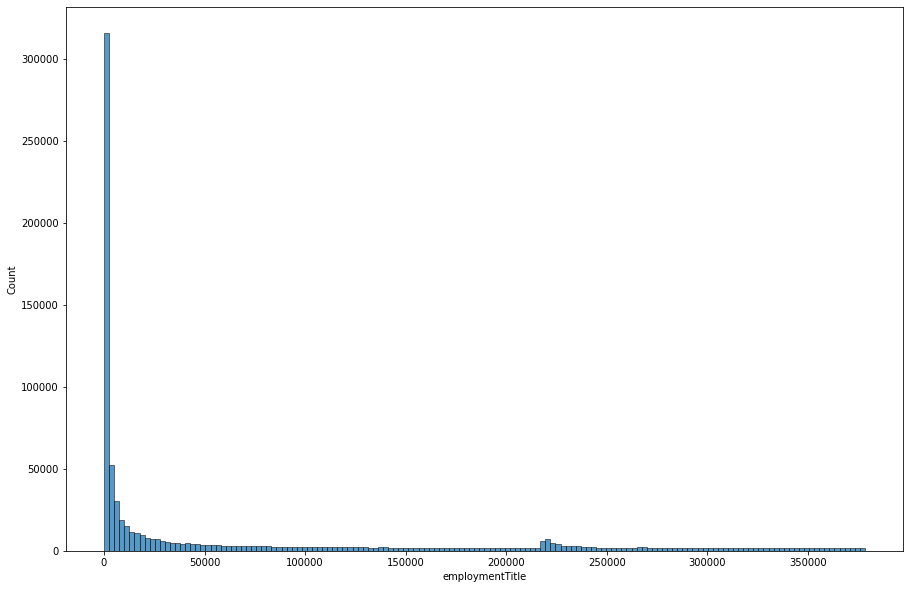

In [19]:
Plot_Col_Distribution(train_X,'employmentTitle')

In [20]:
#根据图示采用众数填充 employmentTitle
train_X['employmentTitle'] = Missing_Imputer_Medthod(train_X,col = 'employmentTitle',method= 'most_frequent')

特征：employmentLength
缺失总数：46799
缺失比例：5.849875%


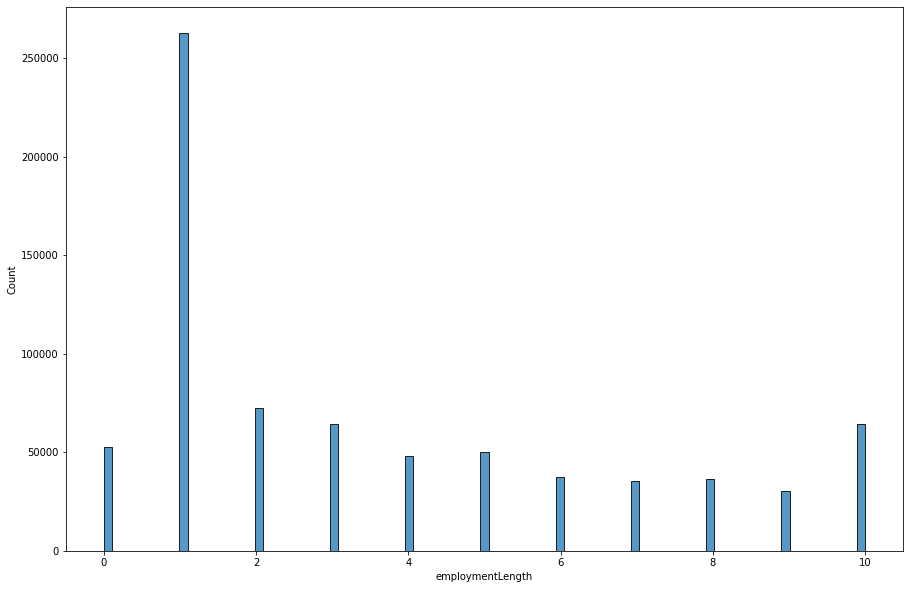

In [21]:
Plot_Col_Distribution(train_X,'employmentLength')

In [24]:
#采用已有特征取值随机填充 employmentLength
train_X['employmentLength'] = Missing_Imputer_Medthod(train_X,col= 'employmentLength',method='random')

特征：postCode
缺失总数：1
缺失比例：0.000125%


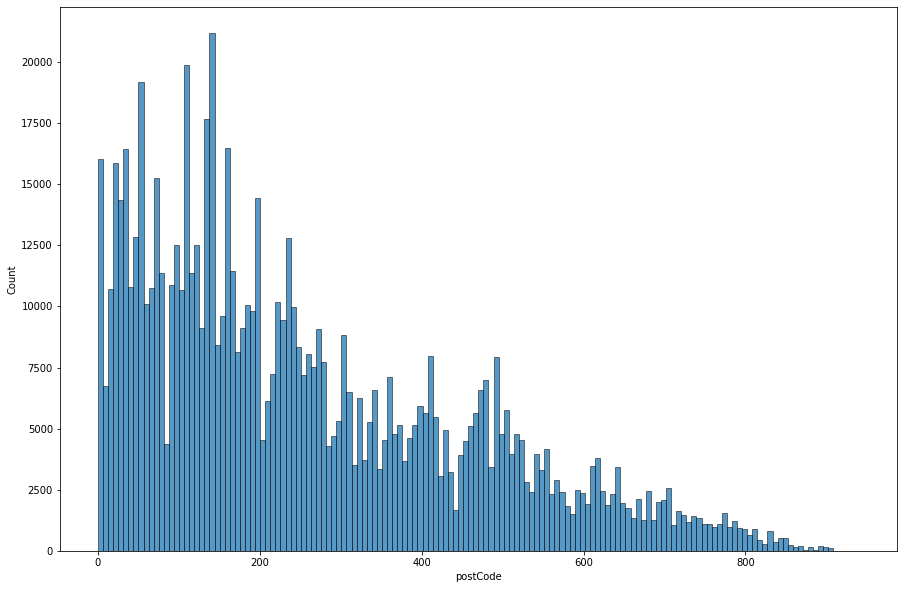

In [25]:
Plot_Col_Distribution(train_X,'postCode')

In [26]:
#采用随机填充 postCode
train_X['postCode'] = Missing_Imputer_Medthod(train_X, col='postCode',method = 'random')

特征：dti
缺失总数：239
缺失比例：0.029875000000000002%


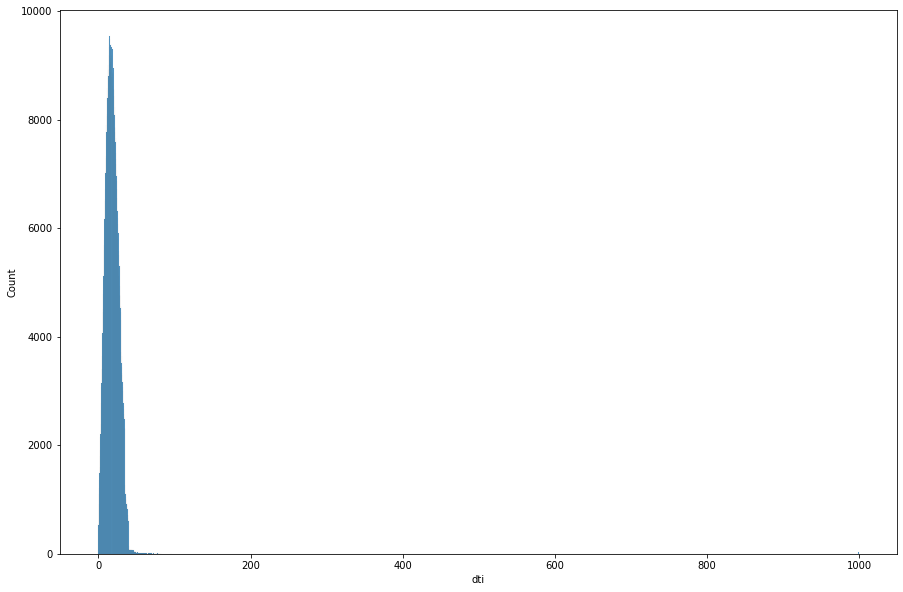

In [27]:
Plot_Col_Distribution(train_X, 'dti')

In [28]:
#dti 的分布近似正太分布，采用中位数填充
train_X['dti'] = Missing_Imputer_Medthod(train_X, col='dti',method='median')

特征：pubRecBankruptcies
缺失总数：405
缺失比例：0.050624999999999996%


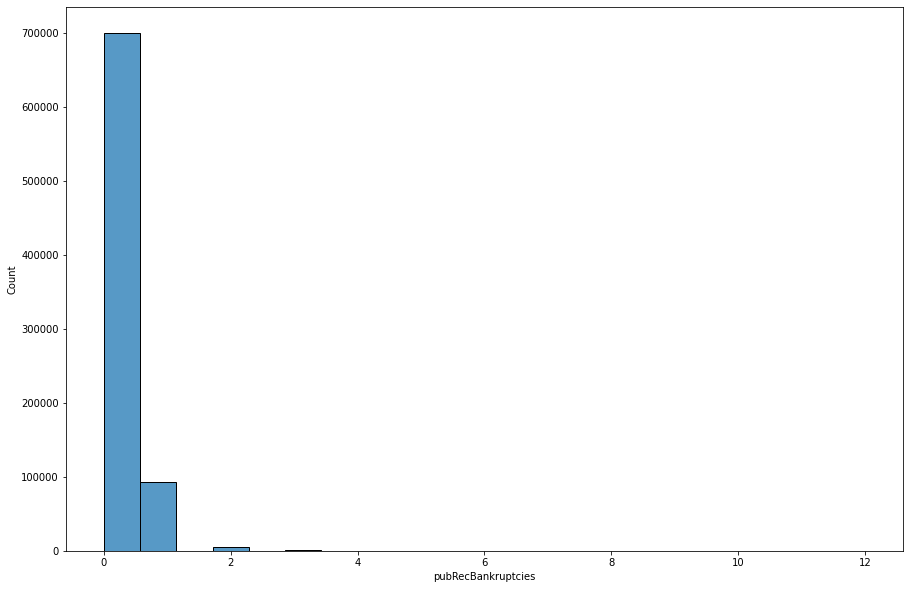

In [30]:
Plot_Col_Distribution(train_X, 'pubRecBankruptcies')

In [31]:
#采用众数，填充
train_X['pubRecBankruptcies'] = Missing_Imputer_Medthod(train_X,col='pubRecBankruptcies',method='most_frequent')

特征：revolUtil
缺失总数：531
缺失比例：0.06637499999999999%


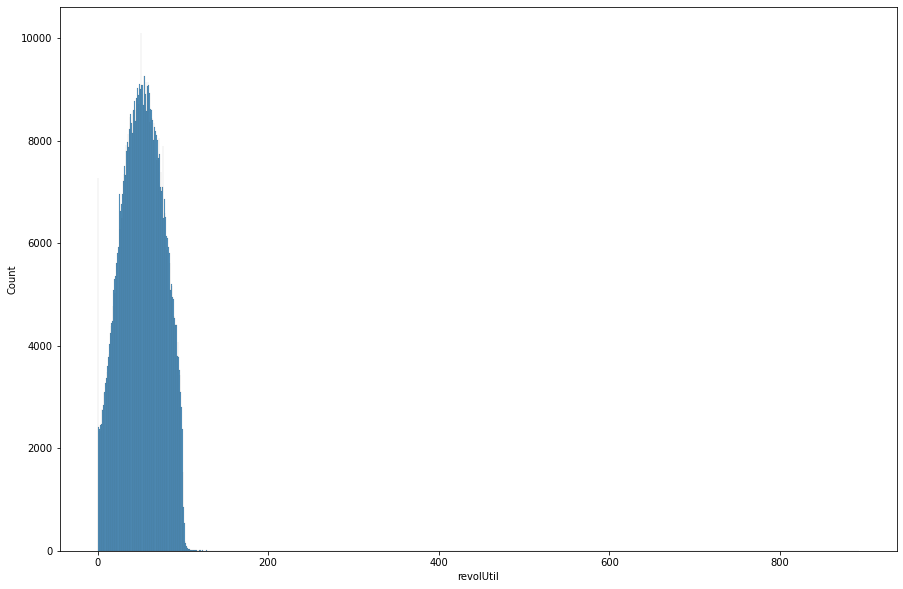

In [32]:
Plot_Col_Distribution(train_X,col = 'revolUtil')

In [33]:
#revolUtil 近似正太分布，采用中位数填充
train_X['revolUtil'] = Missing_Imputer_Medthod(train_X,col = 'revolUtil',method='median')

In [34]:
Missing_Col_Detect(train_X, col = 'title')

特征：title
缺失总数：1
缺失比例：0.000125%
缺失值所在列id，如下：


[531009]

In [35]:
#title只缺失了1一个，采用随机填充
train_X['title'] = Missing_Imputer_Medthod(train_X, col = 'title', method = 'random')

特征：n0
缺失总数：40270
缺失比例：5.03375%


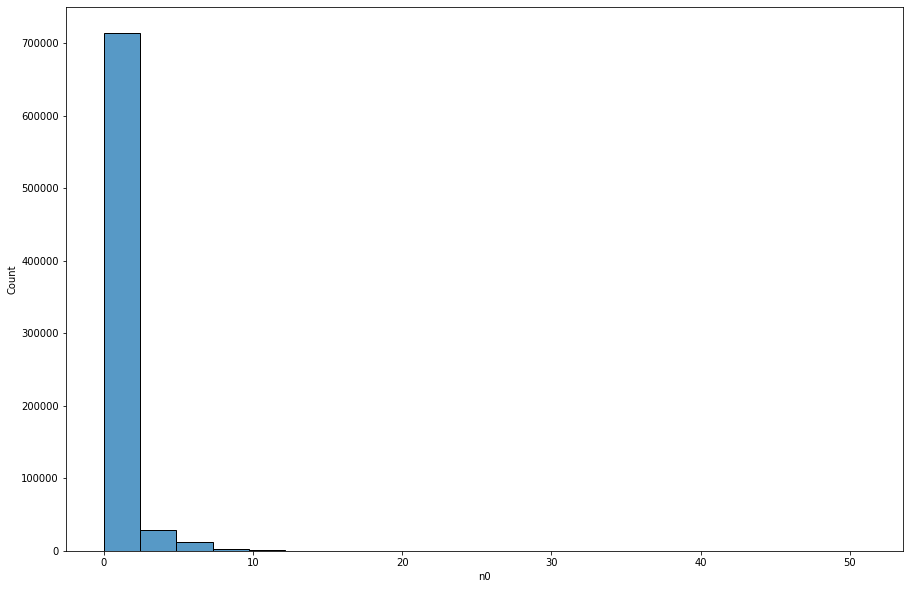

特征：n1
缺失总数：40270
缺失比例：5.03375%


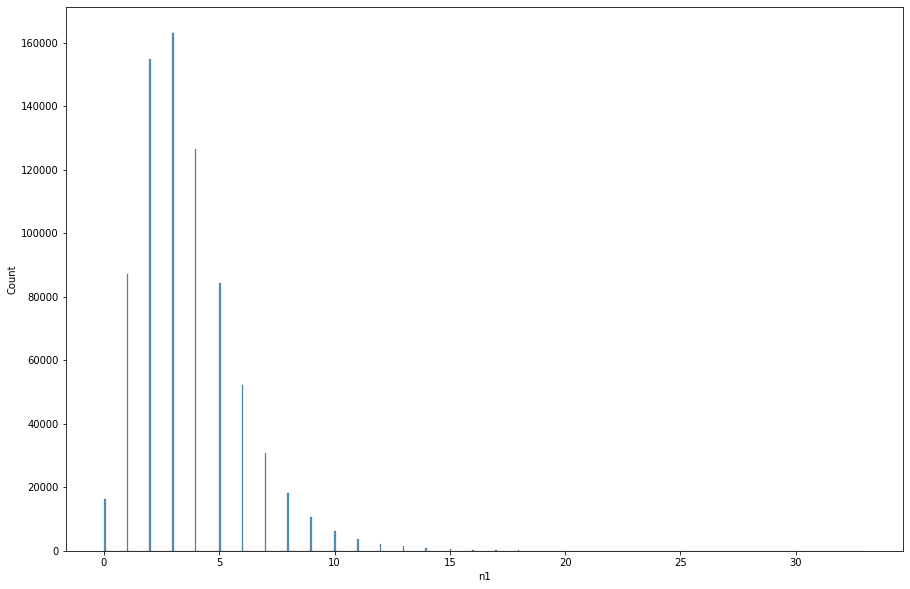

特征：n2
缺失总数：40270
缺失比例：5.03375%


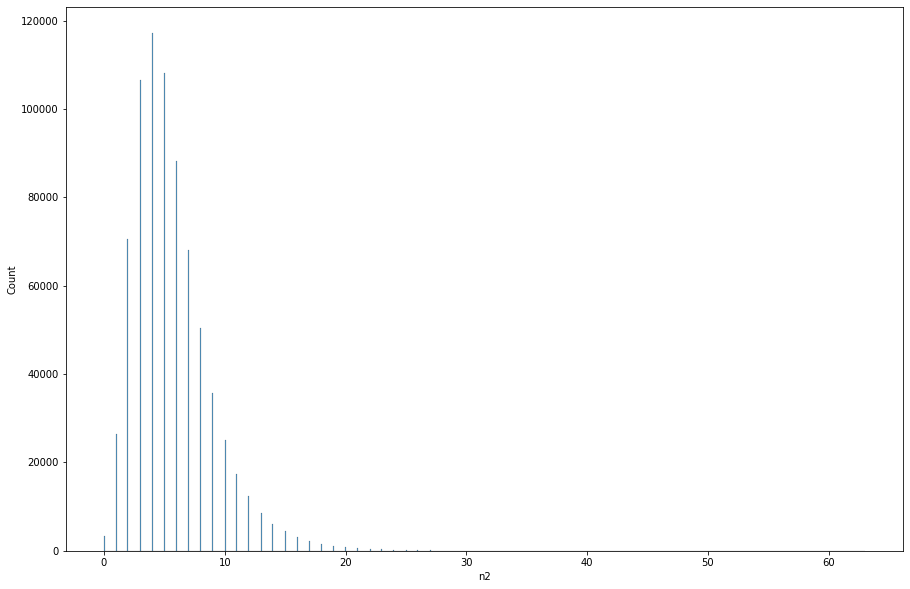

特征：n3
缺失总数：40270
缺失比例：5.03375%


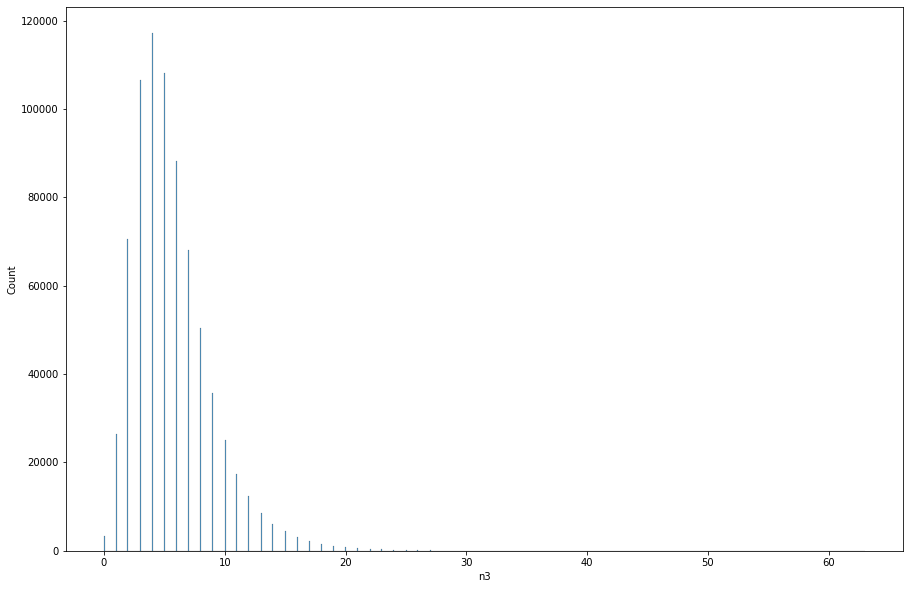

特征：n4
缺失总数：33239
缺失比例：4.1548750000000005%


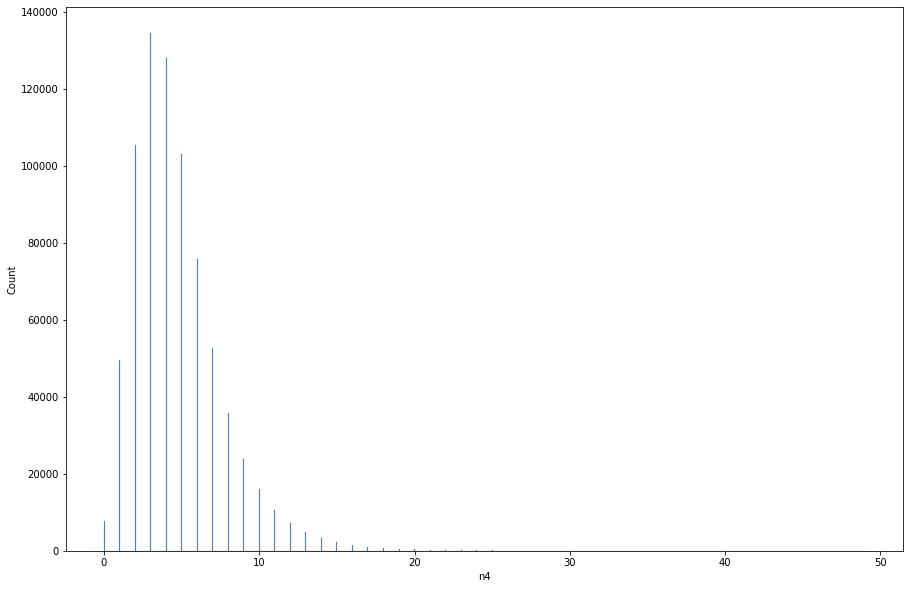

特征：n5
缺失总数：40270
缺失比例：5.03375%


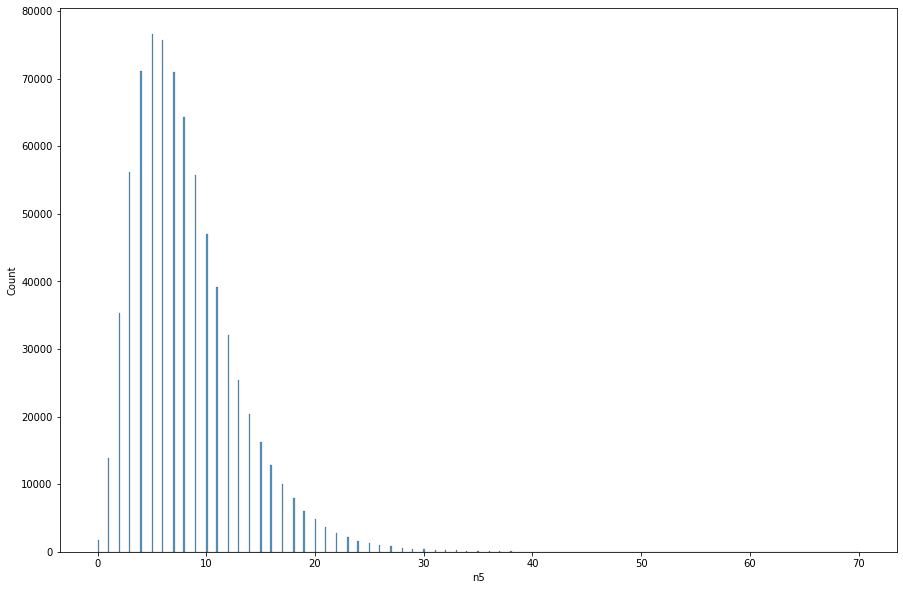

特征：n6
缺失总数：40270
缺失比例：5.03375%


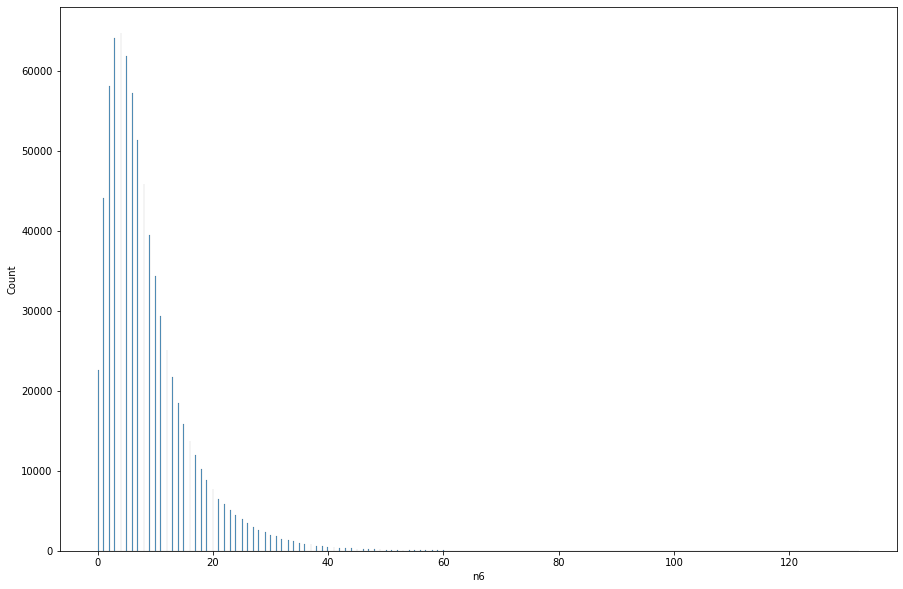

特征：n7
缺失总数：40270
缺失比例：5.03375%


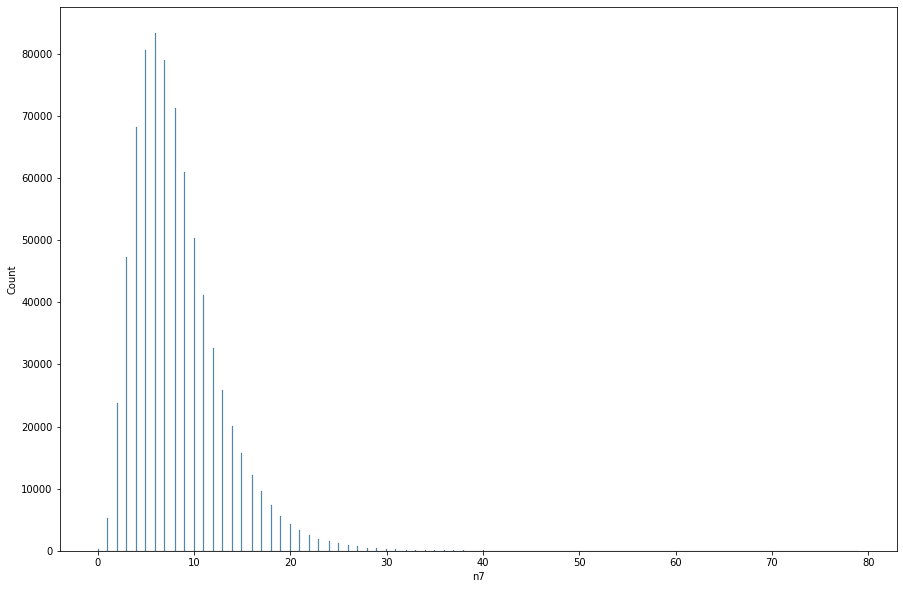

特征：n8
缺失总数：40271
缺失比例：5.033875%


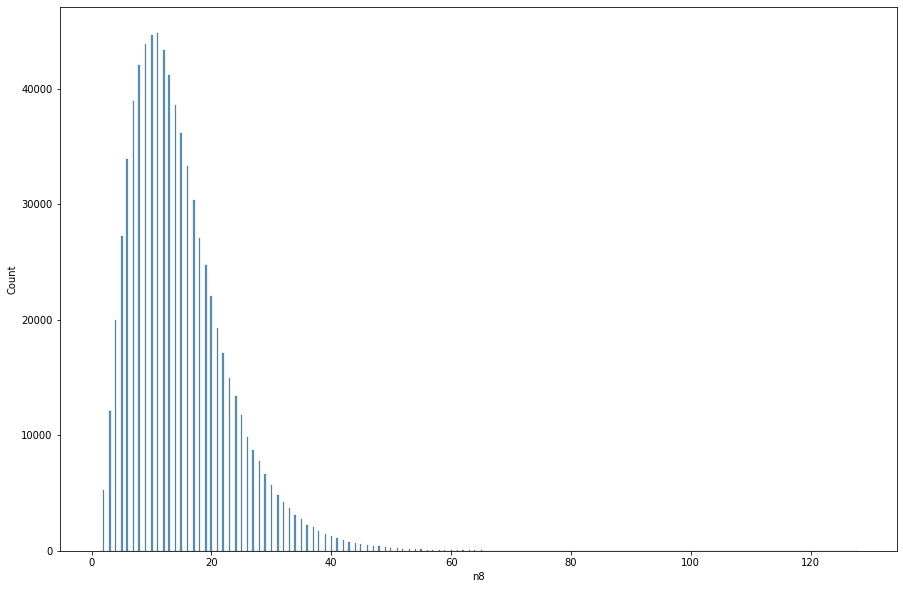

特征：n9
缺失总数：40270
缺失比例：5.03375%


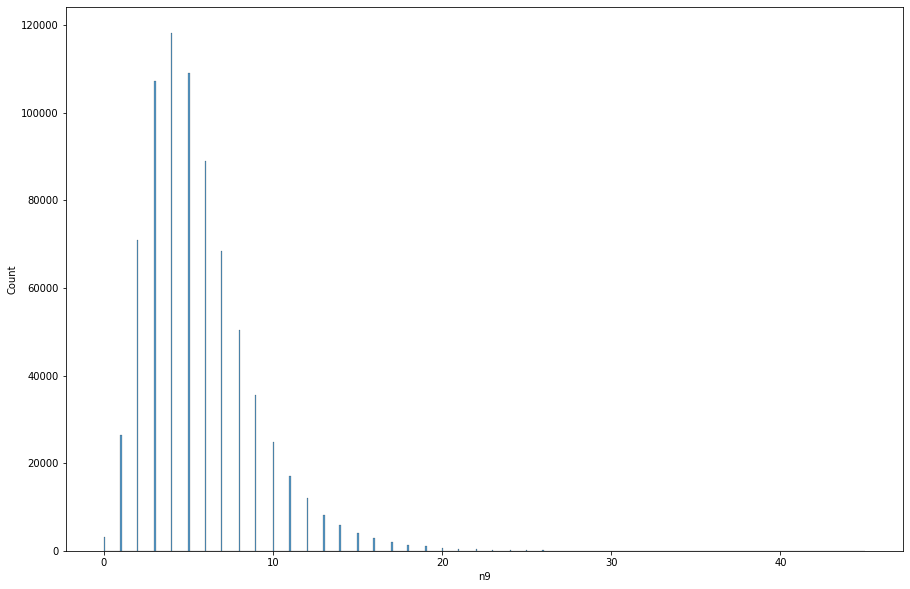

特征：n10
缺失总数：33239
缺失比例：4.1548750000000005%


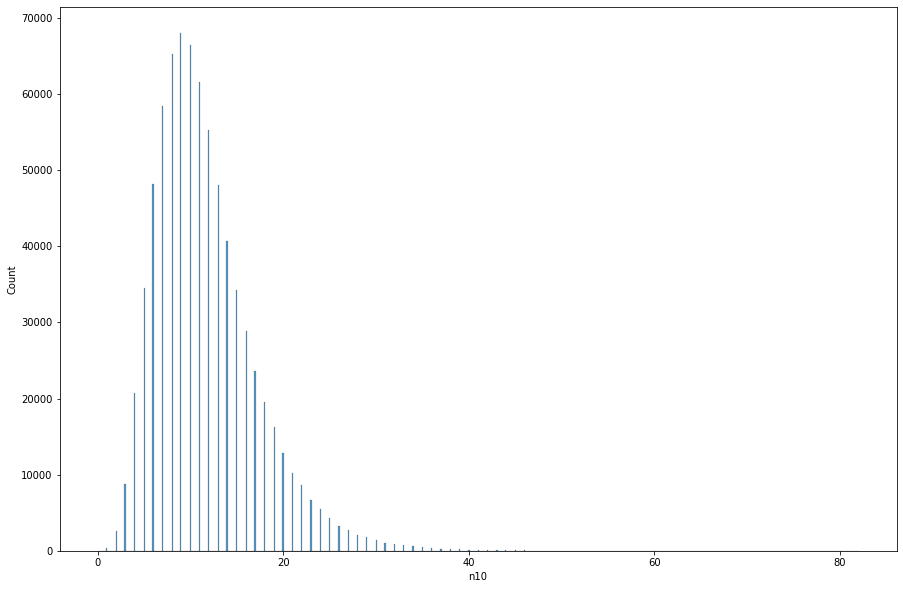

特征：n11
缺失总数：69752
缺失比例：8.719000000000001%


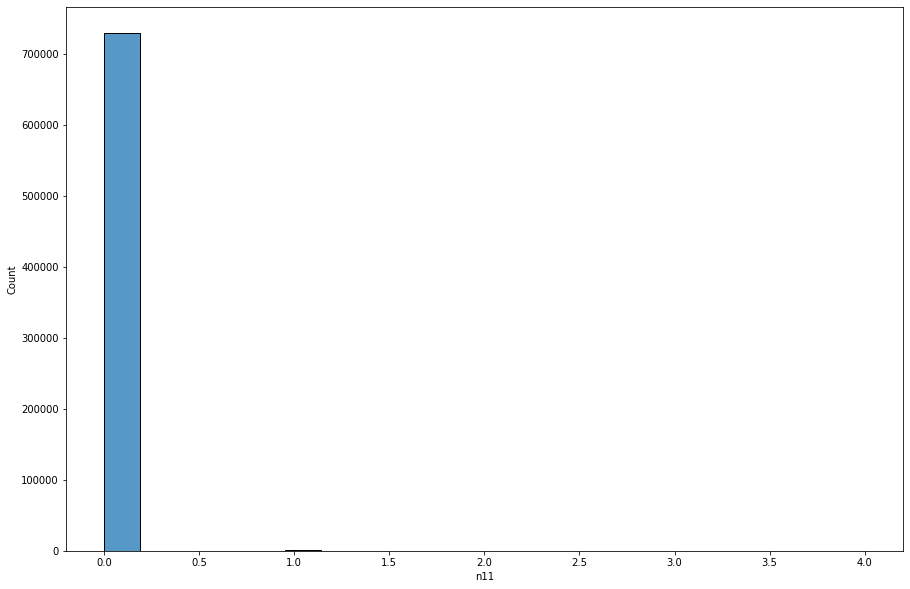

特征：n12
缺失总数：40270
缺失比例：5.03375%


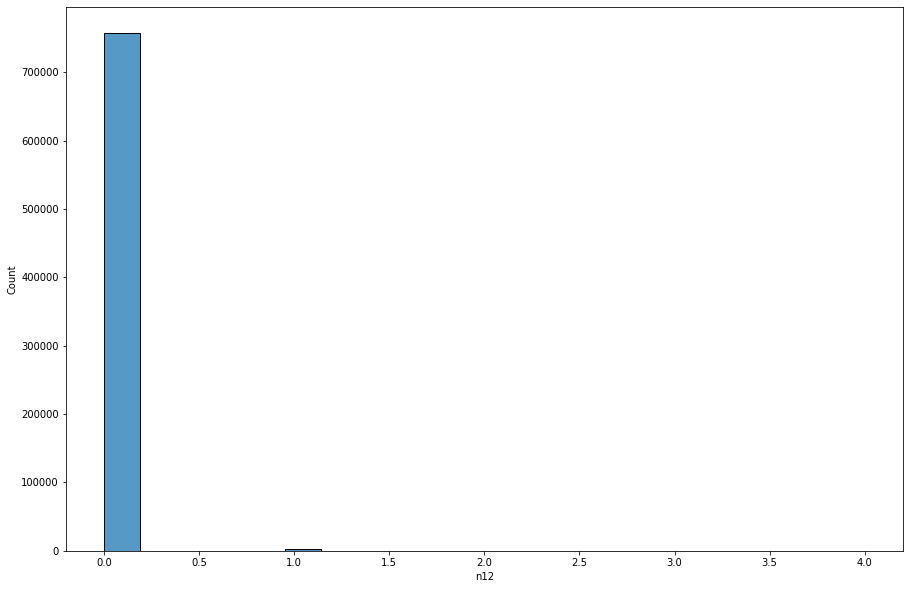

特征：n13
缺失总数：40270
缺失比例：5.03375%


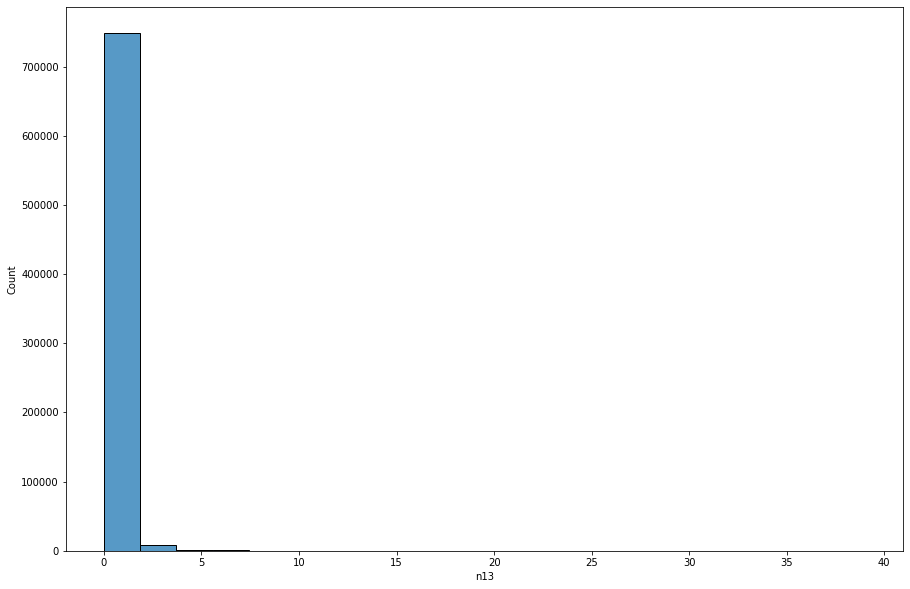

特征：n14
缺失总数：40270
缺失比例：5.03375%


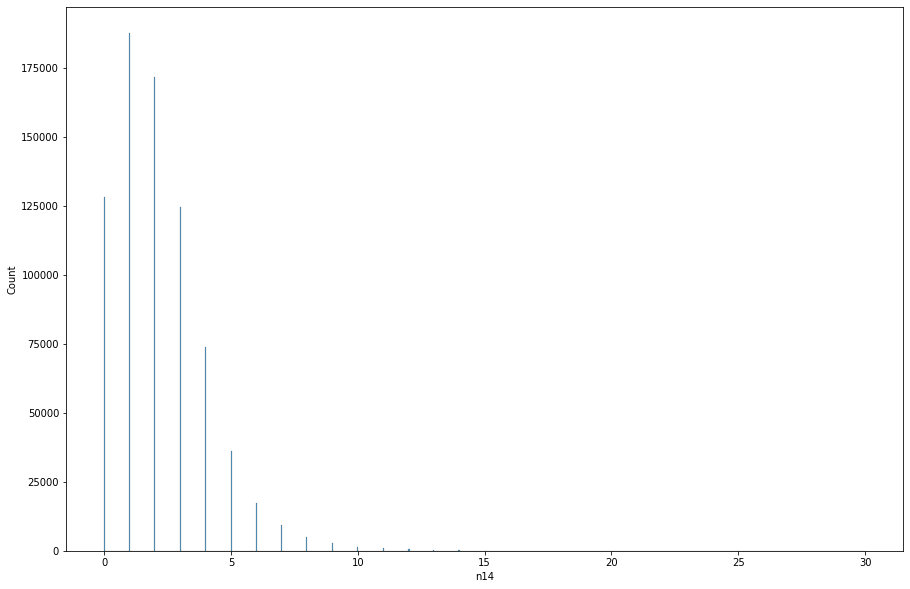

In [39]:
#n0-n14 大多近似正太分布，个别为离散变量，采用随机值
for idx in range(15):
    Plot_Col_Distribution(train_X,col = 'n'+str(idx))
for idx in range(15):
    train_X['n' +str(idx)] = Missing_Imputer_Medthod(train_X,col='n'+str(idx),method='random')

In [41]:
#存储
train_X.to_csv("./train_filled.csv", index = False)

# Outliers 

In [46]:
%run Page_Style.ipynb
%run Feature_Cleaning_utils.ipynb

## loanAmnt

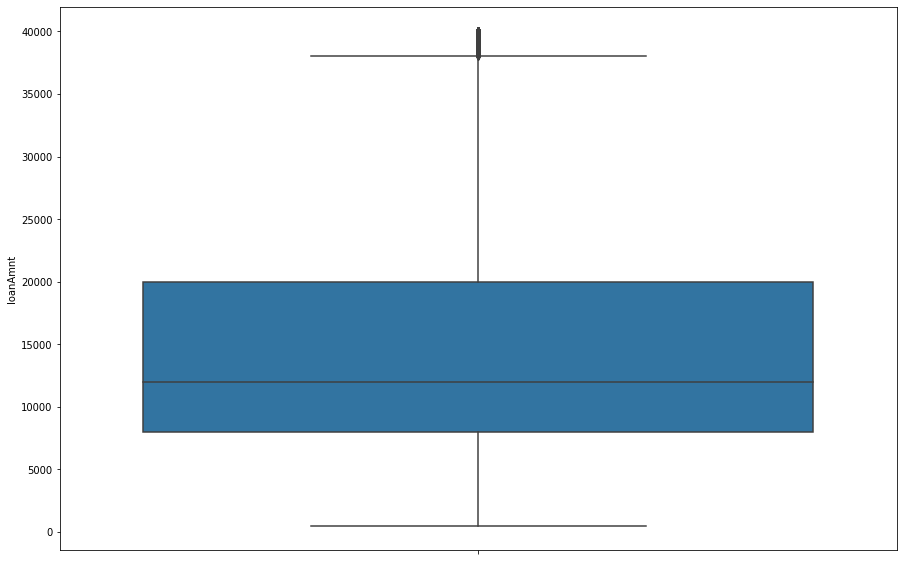

In [48]:
Outliers_Detect_Plot(train_X, col = 'loanAmnt')

In [72]:
train_X['loanAmnt'] = Outliers_Handle_IQR(train_X,col = 'loanAmnt')

## term

3    606902
5    193098
Name: term, dtype: int64


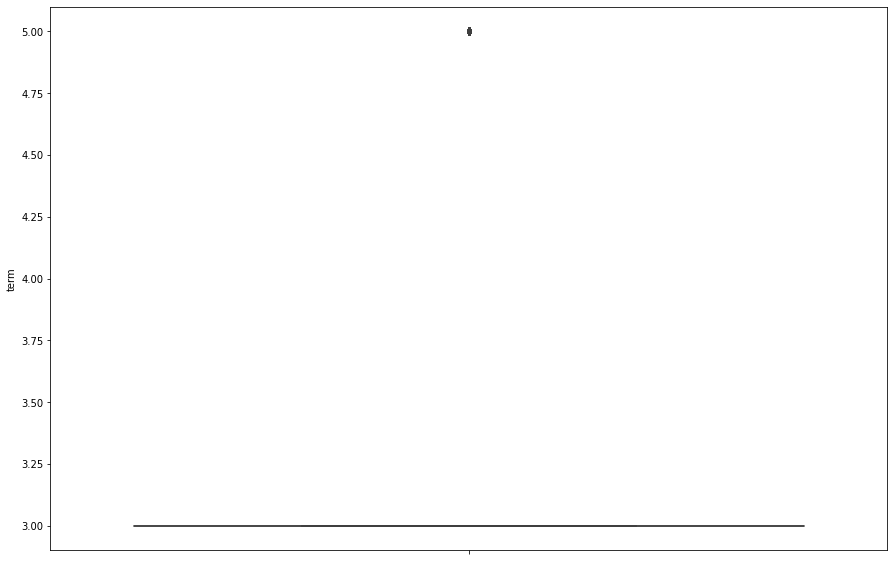

In [77]:
Outliers_Detect_Plot(train_X,col = 'term')
#根据取值，和业务常识，确认term=5 不属于异常值，不做处理

## interestRate

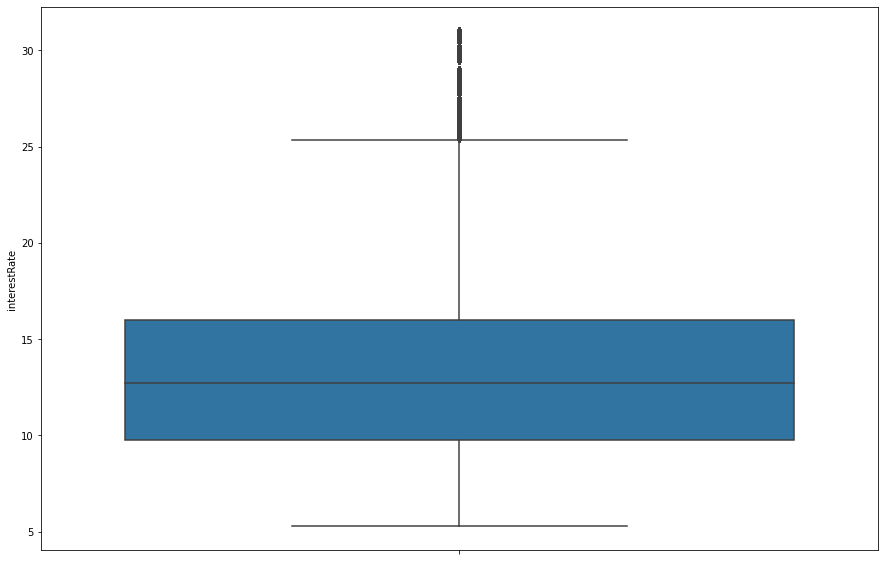

count    800000.000000
mean         13.238391
std           4.765757
min           5.310000
25%           9.750000
50%          12.740000
75%          15.990000
max          30.990000
Name: interestRate, dtype: float64


In [121]:
Outliers_Detect_Plot(train_X,col = 'interestRate')

In [167]:
Outliers_Detect_IQR_Count_Plot(train_X,col = 'interestRate')

high: 25.35
low: 0.39000000000000057
over_high总数：14803, below_low总数：0


In [123]:
train_X['interestRate'] = Outliers_Handle_IQR(train_X,col = 'interestRate')

## installment

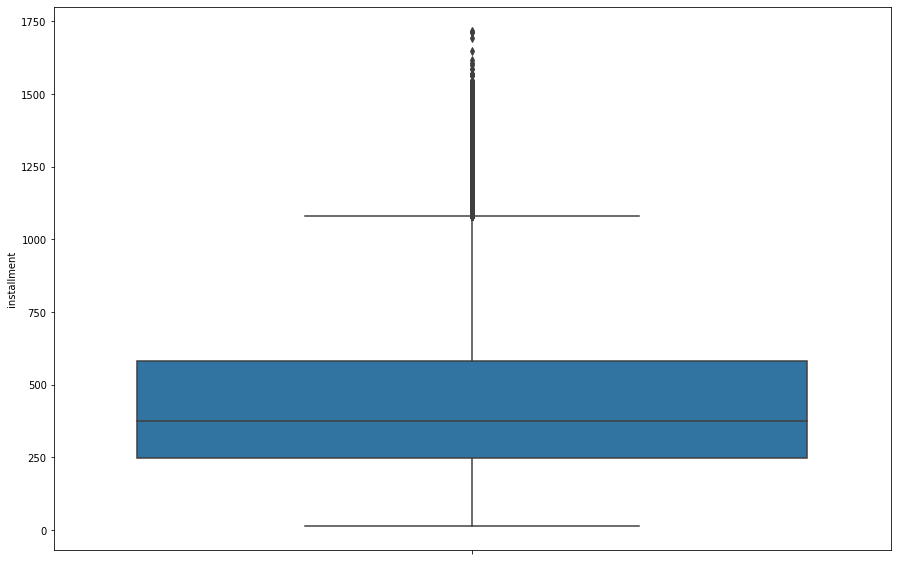

count    800000.000000
mean        437.947723
std         261.460393
min          15.690000
25%         248.450000
50%         375.135000
75%         580.710000
max        1715.420000
Name: installment, dtype: float64


In [125]:
Outliers_Detect_Plot(train_X,'installment')

In [168]:
Outliers_Detect_IQR_Count_Plot(train_X,col = 'installment')

high: 1079.1000000000001
low: -249.9400000000001
over_high总数：24992, below_low总数：0


In [127]:
"""最大分期还款额度为1715，可以认为没有异常"""

'最大分期还款额度为1715，可以认为没有异常'

## employmentTitle

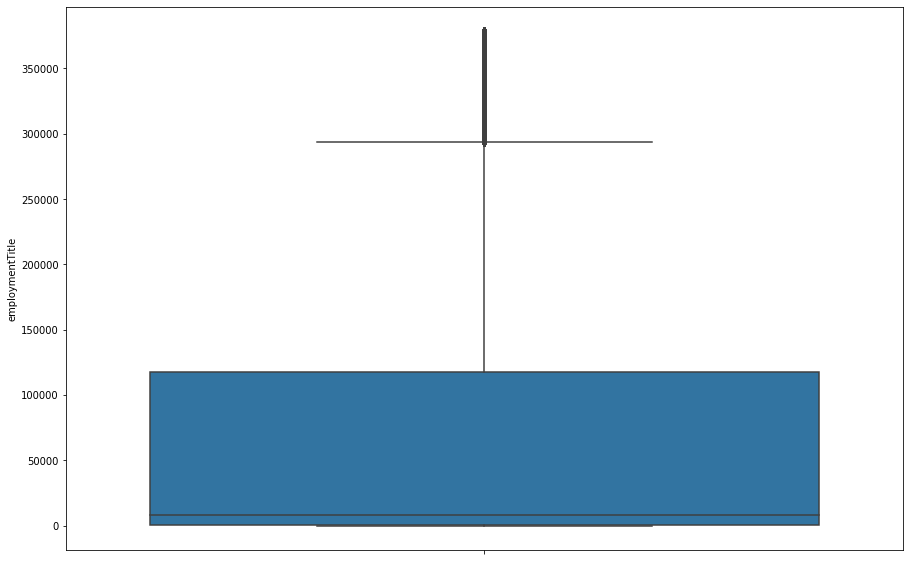

count    800000.000000
mean      72005.261775
std      106585.603945
min           0.000000
25%         427.000000
50%        7755.000000
75%      117663.250000
max      378351.000000
Name: employmentTitle, dtype: float64


In [128]:
Outliers_Detect_Plot(train_X,'employmentTitle')

In [169]:
Outliers_Detect_IQR_Count_Plot(train_X,col = 'employmentTitle')

high: 293517.625
low: -175427.375
over_high总数：53171, below_low总数：0


In [171]:
"""employmentTitle的取值有很多属于rare value，采用极值填充"""
train_X['employmentTitle'] = Outliers_Handle_IQR(train_X,col = 'employmentTitle')

## employmentLength

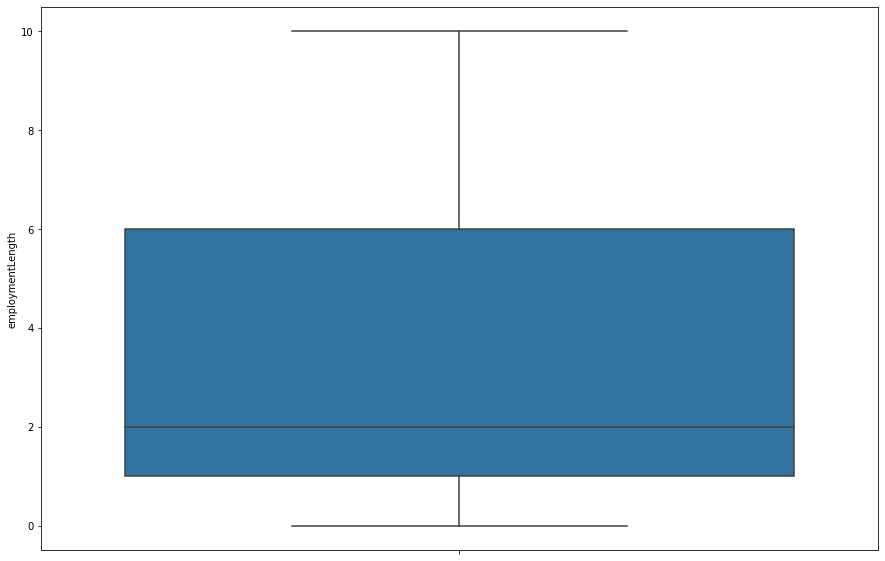

count    800000.000000
mean          3.689571
std           3.194188
min           0.000000
25%           1.000000
50%           2.000000
75%           6.000000
max          10.000000
Name: employmentLength, dtype: float64


In [149]:
Outliers_Detect_Plot(train_X, col = 'employmentLength')

In [150]:
"""employmentLength没有异常"""

'employmentLength没有异常'

## homeOwnership

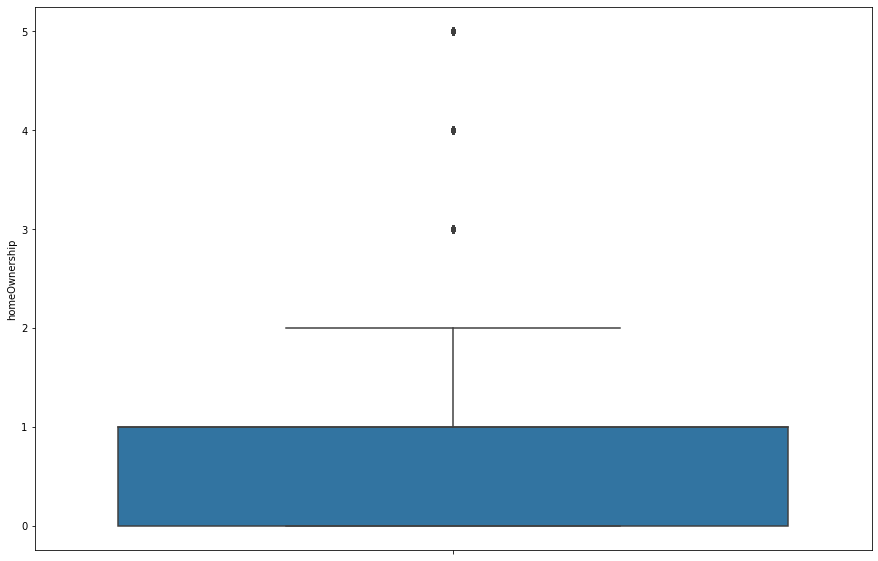

count    800000.000000
mean          0.614213
std           0.675749
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: homeOwnership, dtype: float64


In [151]:
Outliers_Detect_Plot(train_X, col = 'homeOwnership')

In [172]:
Outliers_Detect_IQR_Count_Plot(train_X, col = 'homeOwnership')

high: 2.5
low: -1.5
over_high总数：299, below_low总数：0


In [173]:
"""homeOwnership > 1,属于可存在情况，少数人确实会有多余1套房的情况，可以认为是rare value的情况，
采用极值处理"""
train_X['homeOwnership'] = Outliers_Handle_IQR(train_X,col='homeOwnership')

## annualIncome

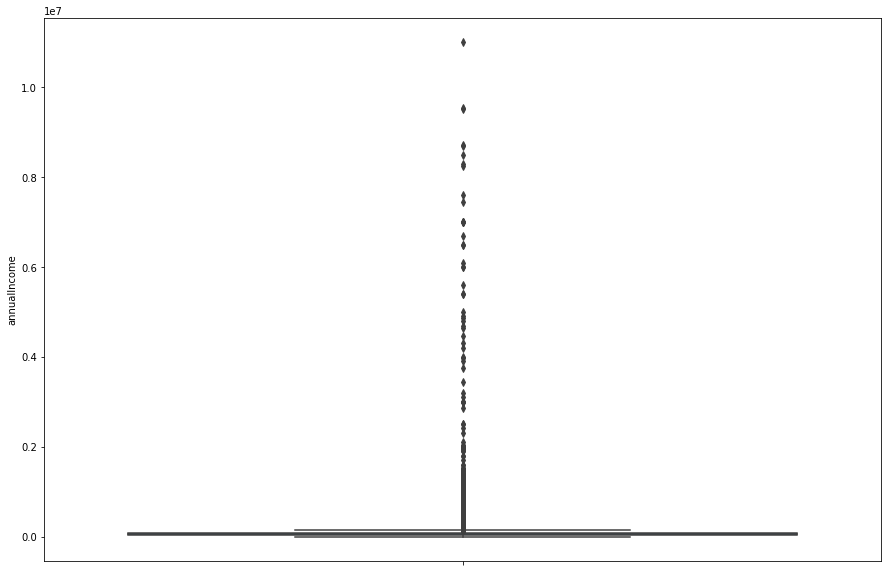

count    8.000000e+05
mean     7.613391e+04
std      6.894751e+04
min      0.000000e+00
25%      4.560000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annualIncome, dtype: float64


In [155]:
Outliers_Detect_Plot(train_X, col = 'annualIncome')

In [162]:
Outliers_Detect_IQR_Count_Plot(train_X, col = 'annualIncome')

high: 156600.0
low: -21000.0
over_high总数：39014, below_low总数：0


In [174]:
"""年收入在15w以上的占比较少，可以看着rare value,采用极值处理"""
Outliers_Handle_IQR(train_X,col = 'annualIncome')

0         110000.0
1          46000.0
2          74000.0
3         118000.0
4          29000.0
            ...   
799995     72000.0
799996     99000.0
799997     65000.0
799998     96000.0
799999    120000.0
Name: annualIncome, Length: 800000, dtype: float64

## verificationStatus

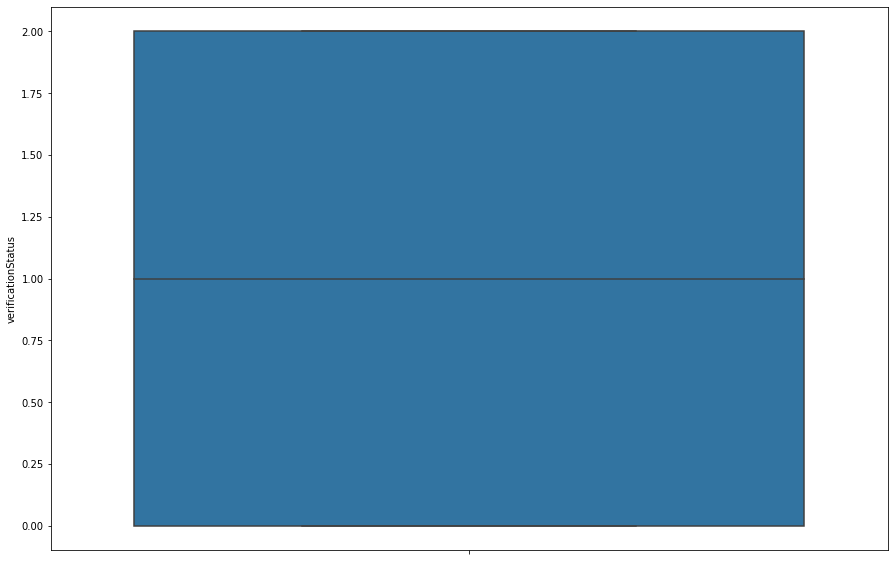

count    800000.000000
mean          1.009683
std           0.782716
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: verificationStatus, dtype: float64


In [164]:
Outliers_Detect_Plot(train_X, 'verificationStatus')

## purpose

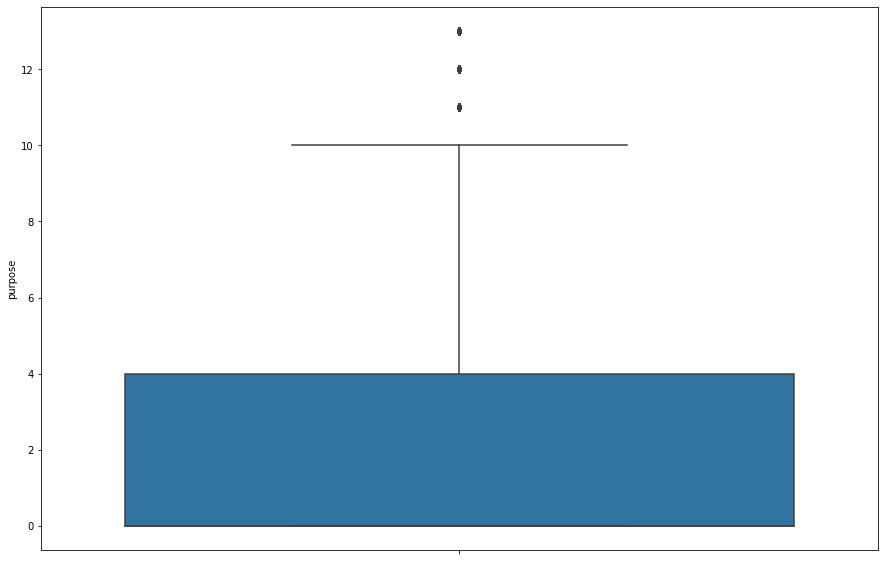

count    800000.000000
mean          1.745982
std           2.367453
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          13.000000
Name: purpose, dtype: float64


In [165]:
Outliers_Detect_Plot(train_X, col = 'purpose')

In [166]:
Outliers_Detect_IQR_Count_Plot(train_X,col = 'purpose')

high: 10.0
low: -6.0
over_high总数：2107, below_low总数：0


In [175]:
train_X['purpose'] = Outliers_Handle_IQR(train_X,col = 'purpose')

## postCode

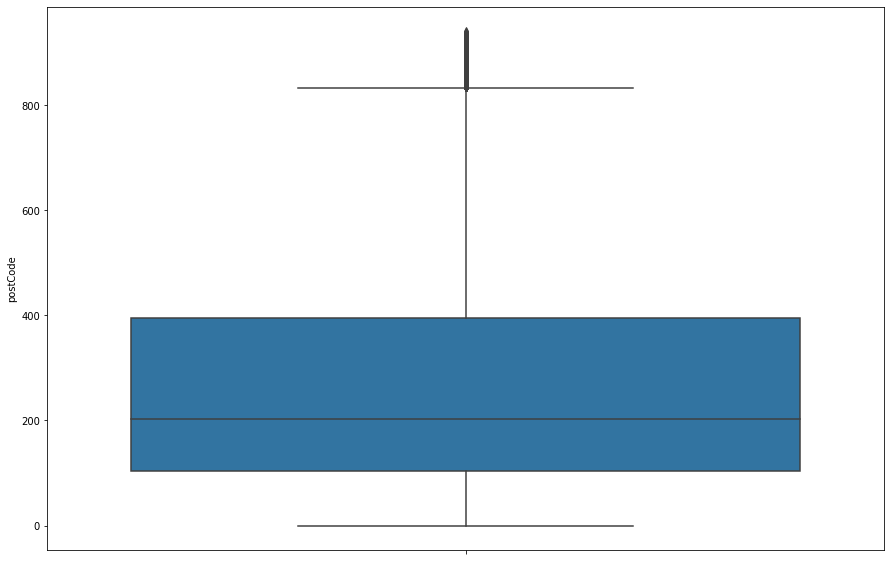

count    800000.000000
mean        258.535675
std         200.037323
min           0.000000
25%         103.000000
50%         203.000000
75%         395.000000
max         940.000000
Name: postCode, dtype: float64


In [176]:
Outliers_Detect_Plot(train_X, col = 'postCode')

In [177]:
Outliers_Detect_IQR_Count_Plot(train_X, col = 'postCode')

high: 833.0
low: -335.0
over_high总数：2715, below_low总数：0


In [178]:
Outliers_Handle_IQR(train_X, col = 'postCode')

0         137.0
1         156.0
2         337.0
3         148.0
4         301.0
          ...  
799995    242.0
799996    563.0
799997     47.0
799998     34.0
799999     62.0
Name: postCode, Length: 800000, dtype: float64

## regionCode

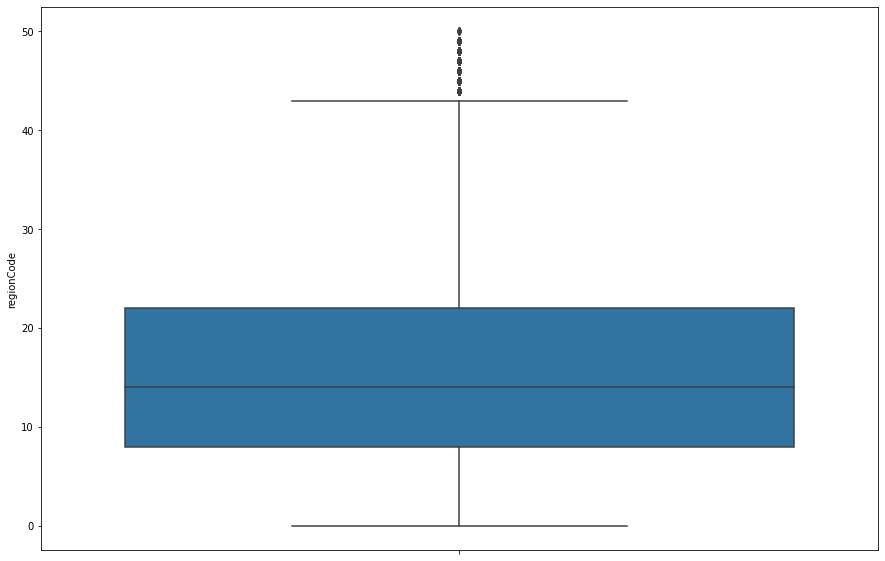

count    800000.000000
mean         16.385758
std          11.036679
min           0.000000
25%           8.000000
50%          14.000000
75%          22.000000
max          50.000000
Name: regionCode, dtype: float64


In [179]:
Outliers_Detect_Plot(train_X, 'regionCode')

In [180]:
Outliers_Detect_IQR_Count_Plot(train_X, col = 'regionCode')

high: 43.0
low: -13.0
over_high总数：14948, below_low总数：0


In [181]:
train_X['regionCode'] = Outliers_Handle_IQR(train_X,col = 'regionCode')

## dti

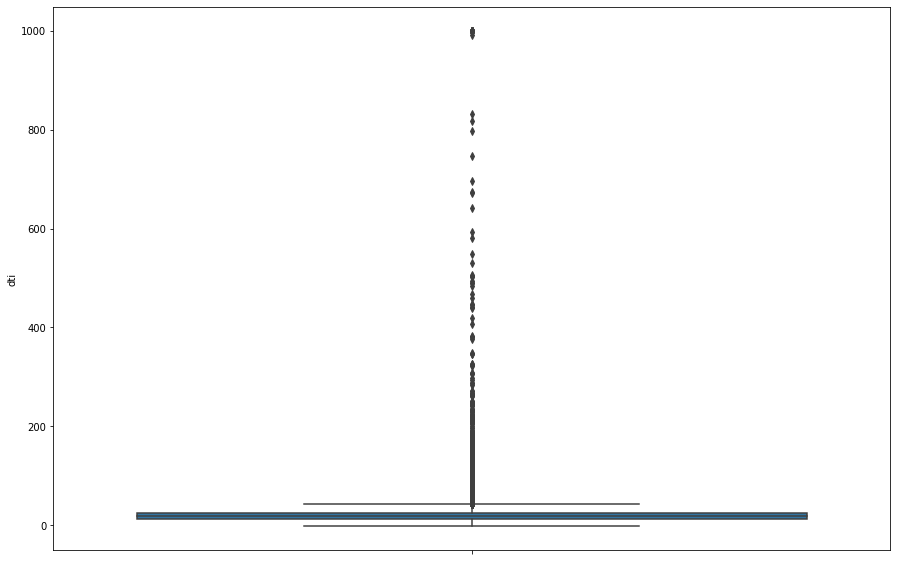

count    800000.000000
mean         18.284356
std          11.148495
min          -1.000000
25%          11.800000
50%          17.610000
75%          24.060000
max         999.000000
Name: dti, dtype: float64


In [182]:
Outliers_Detect_Plot(train_X,'dti')

In [183]:
Outliers_Detect_IQR_Count_Plot(train_X, 'dti')

high: 42.449999999999996
low: -6.589999999999996
over_high总数：3271, below_low总数：0


In [185]:
"""dti为债务收入比，从业务角度看，比率过高可能是异常值"""
train_X['dti'] = Outliers_Handle_IQR(train_X,'dti')

## delinquency_2years

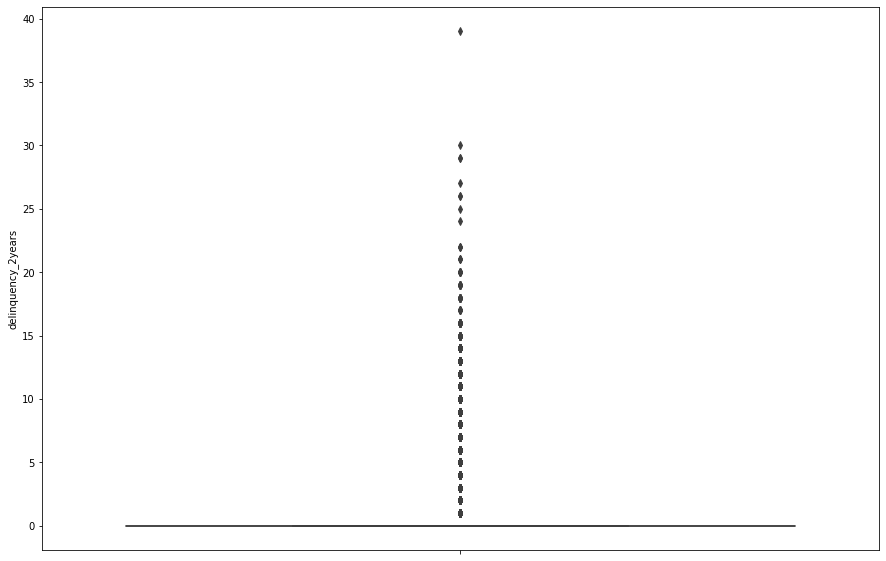

count    800000.000000
mean          0.318239
std           0.880325
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: delinquency_2years, dtype: float64


In [186]:
Outliers_Detect_Plot(train_X, col = 'delinquency_2years')

In [188]:
Outliers_Detect_IQR_Count_Plot(train_X, col = 'delinquency_2years')

high: 0.0
low: 0.0
over_high总数：154285, below_low总数：0


In [191]:
"""从业务角度看，肯定会有违约的情况发生，但是数据特别高的应当注意，根据其取值，可以在编码时处理一下"""

'从业务角度看，肯定会有违约的情况发生，但是数据特别高的应当注意，根据其取值，可以在编码时处理一下'

In [190]:
train_X['delinquency_2years'].value_counts()

0.0     645715
1.0     102586
2.0      29944
3.0      10919
4.0       4808
5.0       2504
6.0       1399
7.0        770
8.0        443
9.0        293
10.0       192
11.0       144
12.0        86
14.0        53
13.0        50
15.0        23
16.0        20
18.0        13
19.0        10
20.0         7
17.0         6
22.0         3
21.0         3
29.0         2
26.0         2
25.0         1
27.0         1
39.0         1
30.0         1
24.0         1
Name: delinquency_2years, dtype: int64

## ficoRangeLow

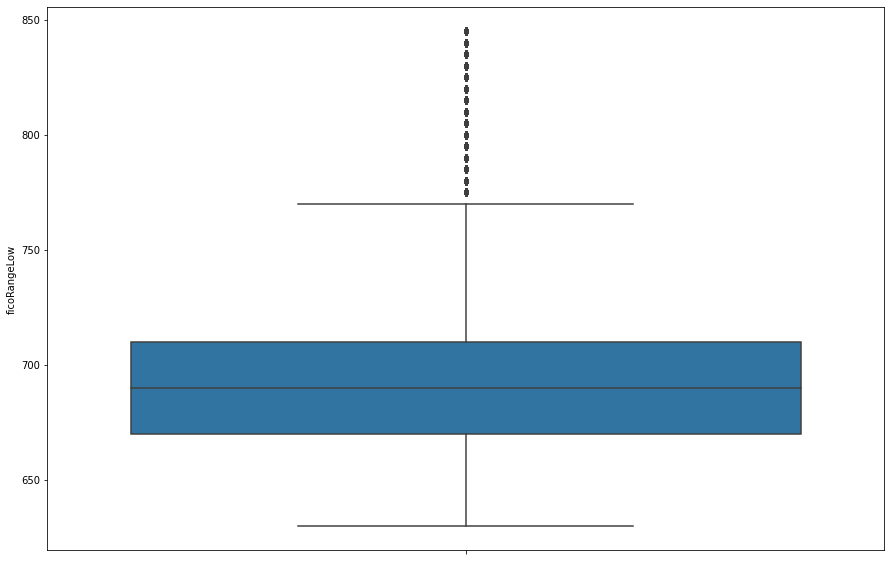

count    800000.000000
mean        696.204081
std          31.865995
min         630.000000
25%         670.000000
50%         690.000000
75%         710.000000
max         845.000000
Name: ficoRangeLow, dtype: float64


In [192]:
Outliers_Detect_Plot(train_X, 'ficoRangeLow')

In [194]:
Outliers_Detect_IQR_Count_Plot(train_X,col = 'ficoRangeLow')

high: 770.0
low: 610.0
over_high总数：27667, below_low总数：0


In [195]:
"""'ficoRangeLow', 'ficoRangeHigh' 成线性关系，可在编码时处理
"""

"'ficoRangeLow', 'ficoRangeHigh' 成线性关系，可在编码时处理\n"

## openAcc

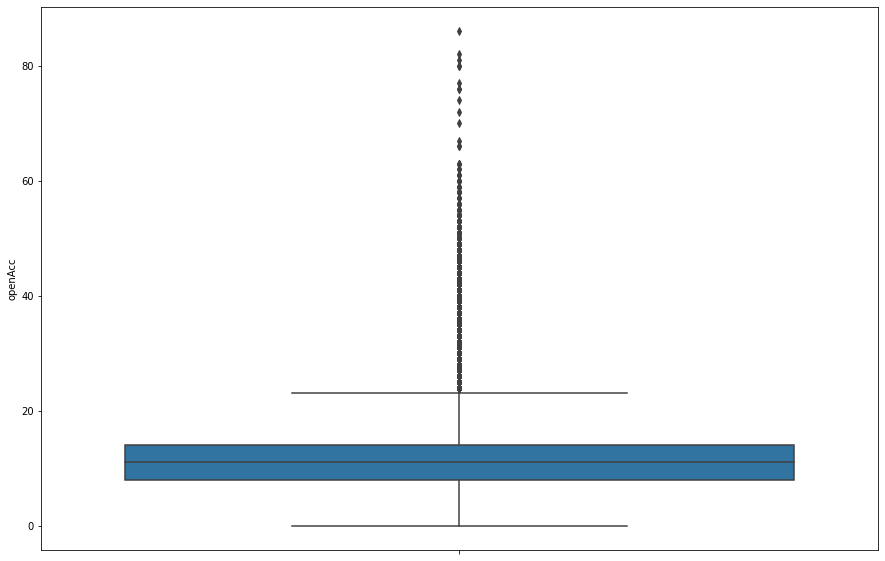

count    800000.000000
mean         11.598020
std           5.475286
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          86.000000
Name: openAcc, dtype: float64


In [196]:
Outliers_Detect_Plot(train_X,col = 'openAcc')

In [198]:
Outliers_Detect_IQR_Count_Plot(train_X,col = 'openAcc')

high: 23.0
low: -1.0
over_high总数：27439, below_low总数：0


In [199]:
"""openAcc, 部分数值过大，同样可以在编码阶段做处理"""

'openAcc, 部分数值过大，同样可以在编码阶段做处理'

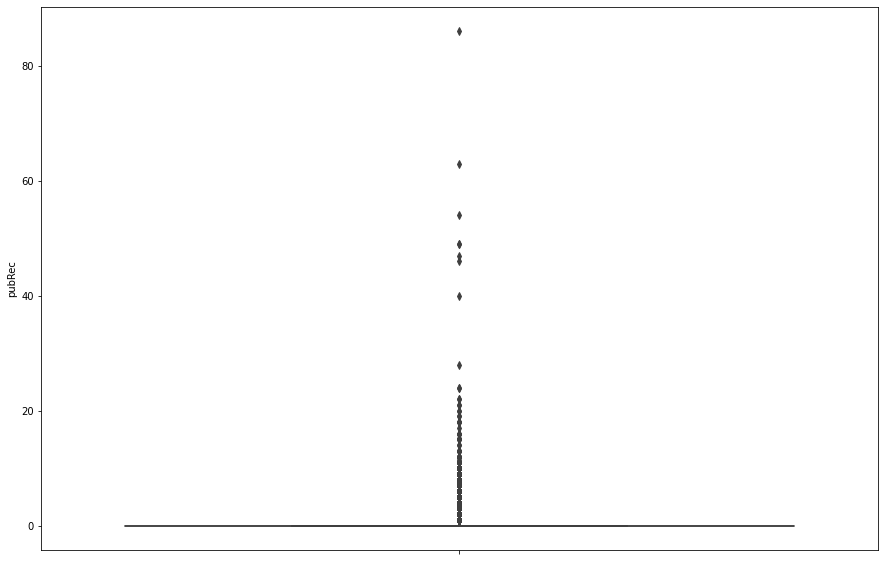

count    800000.000000
mean          0.214915
std           0.606467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pubRec, dtype: float64


In [200]:
Outliers_Detect_Plot(train_X, col = 'pubRec')

In [201]:
Outliers_Detect_IQR_Count_Plot(train_X, col = 'pubRec')

high: 0.0
low: 0.0
over_high总数：135235, below_low总数：0


In [202]:
"""同openAcc ，在编码阶段做处理"""

'同openAcc ，在编码阶段做处理'

## pubRecBankruptcies

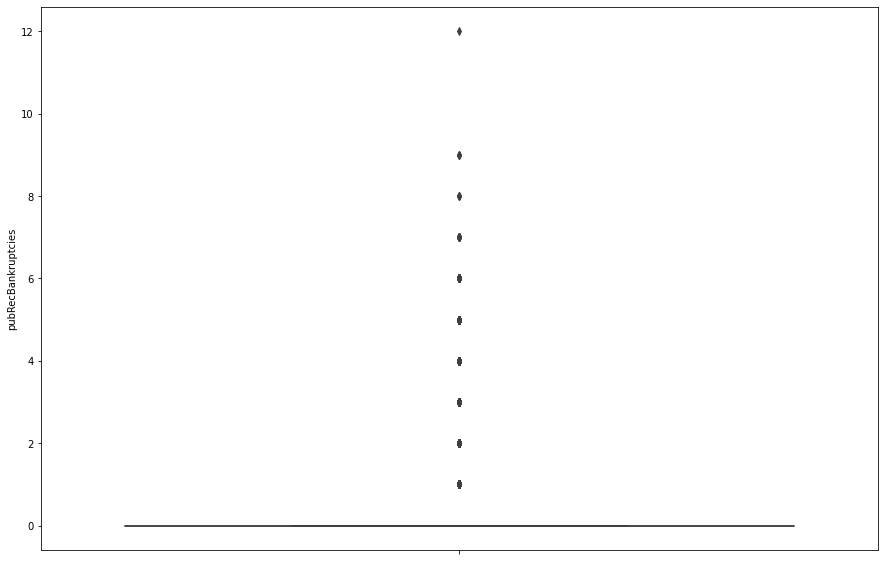

count    800000.000000
mean          0.134095
std           0.377387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: pubRecBankruptcies, dtype: float64


In [204]:
Outliers_Detect_Plot(train_X, col = 'pubRecBankruptcies')

In [206]:
Outliers_Detect_IQR_Count_Plot(train_X, col = 'pubRecBankruptcies')

high: 0.0
low: 0.0
over_high总数：99519, below_low总数：0


In [207]:
"""pubRecBankruptcies 编码阶段处理"""

'pubRecBankruptcies 编码阶段处理'

## revolBal

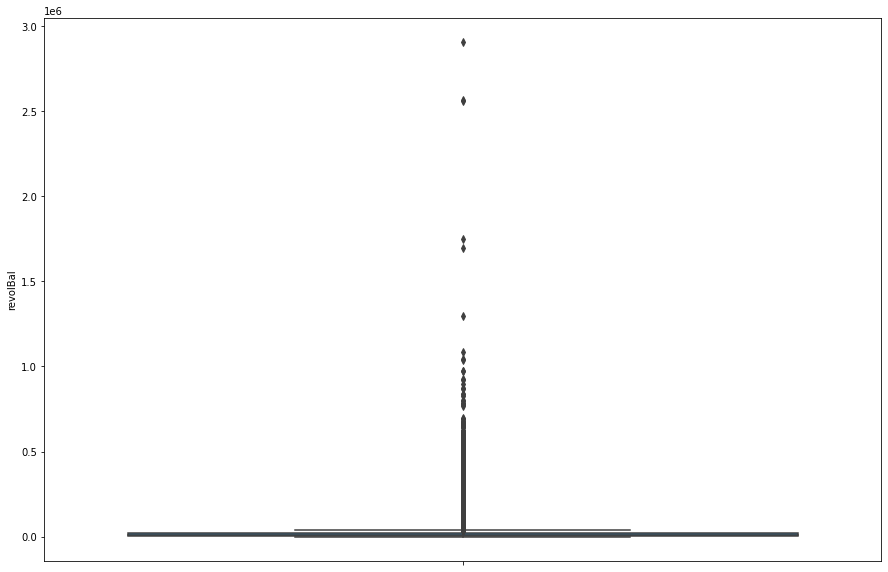

count    8.000000e+05
mean     1.622871e+04
std      2.245802e+04
min      0.000000e+00
25%      5.944000e+03
50%      1.113200e+04
75%      1.973400e+04
max      2.904836e+06
Name: revolBal, dtype: float64


In [208]:
Outliers_Detect_Plot(train_X, col = 'revolBal')

In [209]:
Outliers_Detect_IQR_Count_Plot(train_X, col = 'revolBal')

high: 40419.0
low: -14741.0
over_high总数：47355, below_low总数：0


In [210]:
train_X['revolBal'] = Outliers_Handle_IQR(train_X,col = 'revolBal')

## revolBal


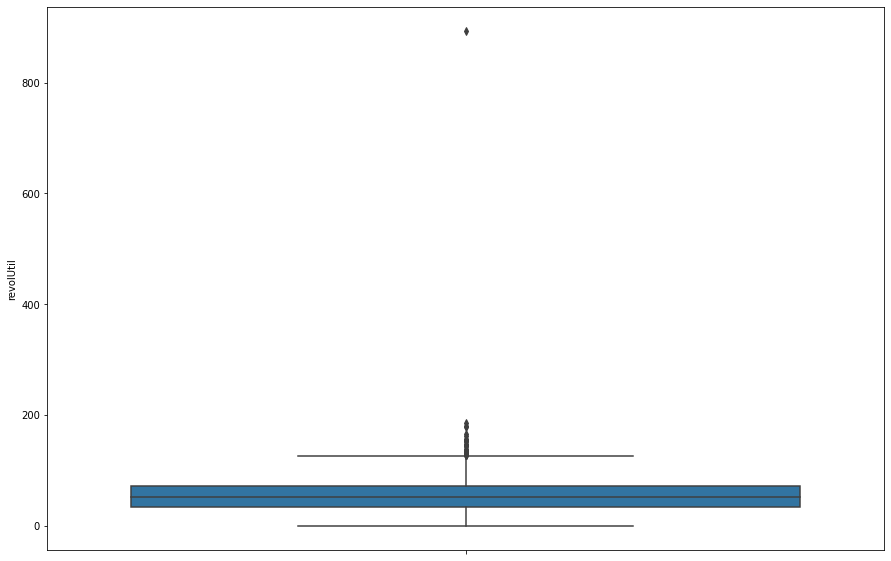

count    800000.000000
mean         51.790939
std          24.507990
min           0.000000
25%          33.500000
50%          52.100000
75%          70.700000
max         892.300000
Name: revolUtil, dtype: float64


In [213]:
Outliers_Detect_Plot(train_X,col = 'revolUtil')

In [214]:
Outliers_Detect_IQR_Count_Plot(train_X, col ='revolUtil')

high: 126.5
low: -22.300000000000004
over_high总数：47, below_low总数：0


In [215]:
train_X['revolUtil'] = Outliers_Handle_IQR(train_X,col = 'revolUtil')

## totalAcc

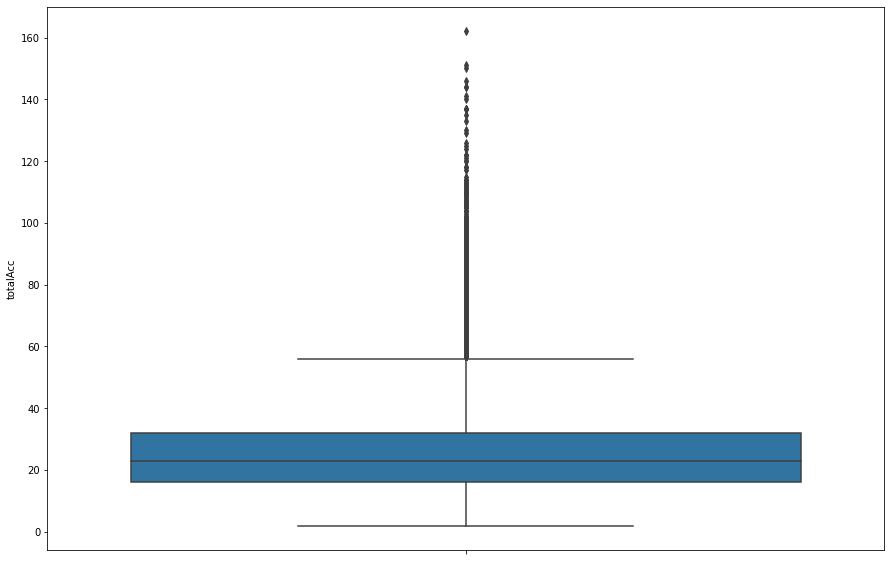

count    800000.000000
mean         24.998861
std          11.999201
min           2.000000
25%          16.000000
50%          23.000000
75%          32.000000
max         162.000000
Name: totalAcc, dtype: float64


In [216]:
Outliers_Detect_Plot(train_X, col ='totalAcc')

In [217]:
Outliers_Detect_IQR_Count_Plot(train_X, col = 'totalAcc')

high: 56.0
low: -8.0
over_high总数：13446, below_low总数：0


In [219]:
train_X['totalAcc'] = Outliers_Handle_IQR(train_X, col = 'totalAcc')

## initialListStatus

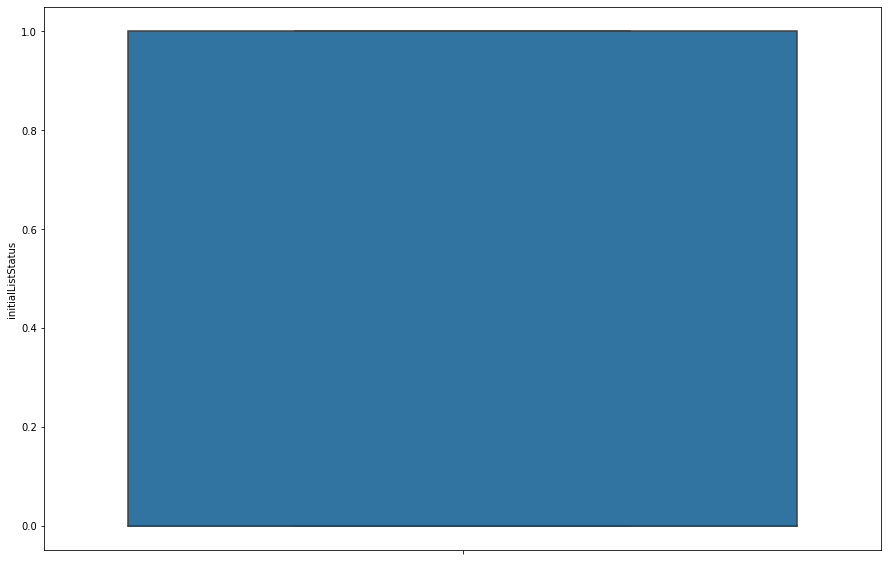

count    800000.000000
mean          0.416953
std           0.493055
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: initialListStatus, dtype: float64


In [220]:
Outliers_Detect_Plot(train_X, col = 'initialListStatus')

In [221]:
"""initialListStatus 无明显异常"""

'initialListStatus 无明显异常'

## applicationType

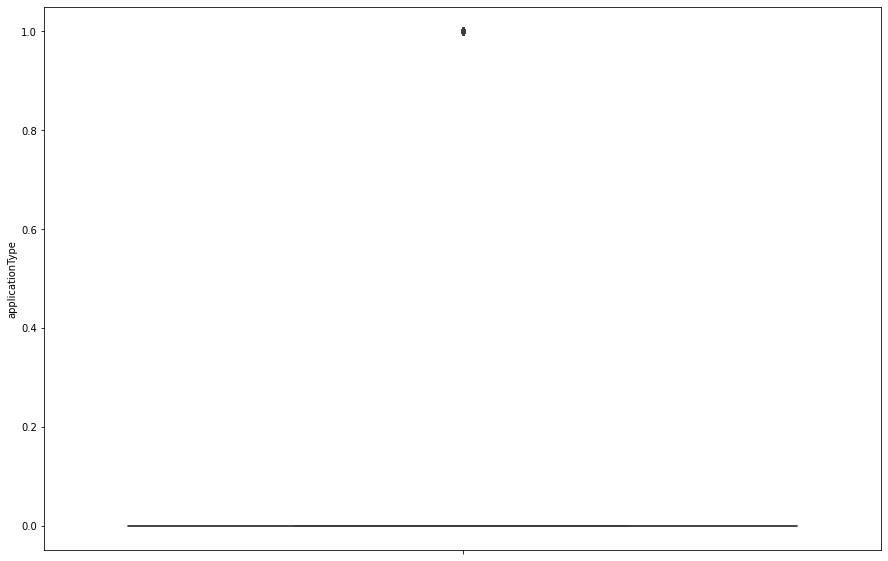

count    800000.000000
mean          0.019267
std           0.137464
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: applicationType, dtype: float64


In [222]:
Outliers_Detect_Plot(train_X,col = 'applicationType')

In [223]:
Outliers_Detect_IQR_Count_Plot(train_X, col = 'applicationType')

high: 0.0
low: 0.0
over_high总数：15414, below_low总数：0


In [226]:
"""根据数值统计，可以看出，applicationType=1 在业务上是可能的，因此不认定为异常值"""
train_X['applicationType'].value_counts()

0    784586
1     15414
Name: applicationType, dtype: int64

## title

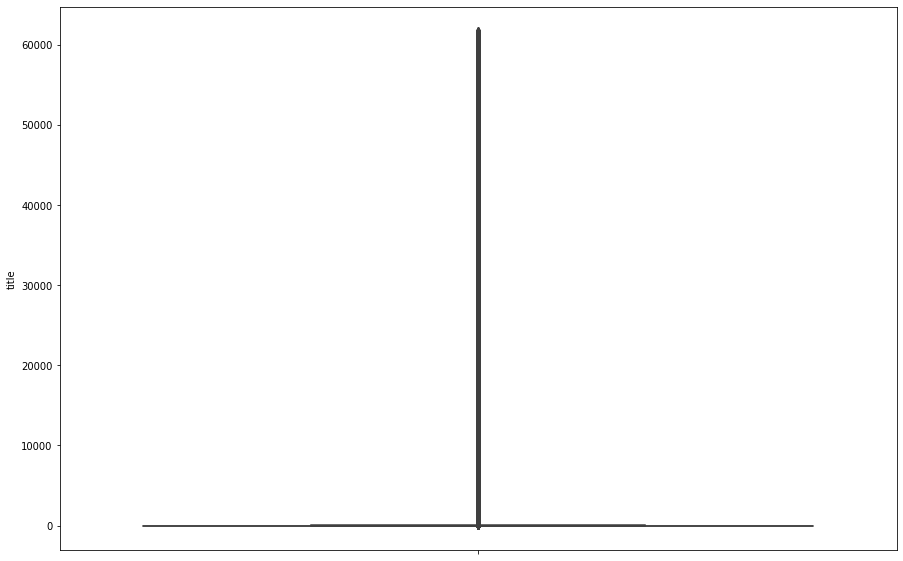

count    800000.000000
mean       1754.156596
std        7941.562240
min           0.000000
25%           0.000000
50%           1.000000
75%           5.000000
max       61680.000000
Name: title, dtype: float64


In [227]:
Outliers_Detect_Plot(train_X, col = 'title')

In [228]:
Outliers_Detect_IQR_Count_Plot(train_X, col = 'title')

high: 12.5
low: -7.5
over_high总数：114382, below_low总数：0


In [230]:
train_X['title'] = Outliers_Handle_IQR(train_X, col = 'title')

## policyCode

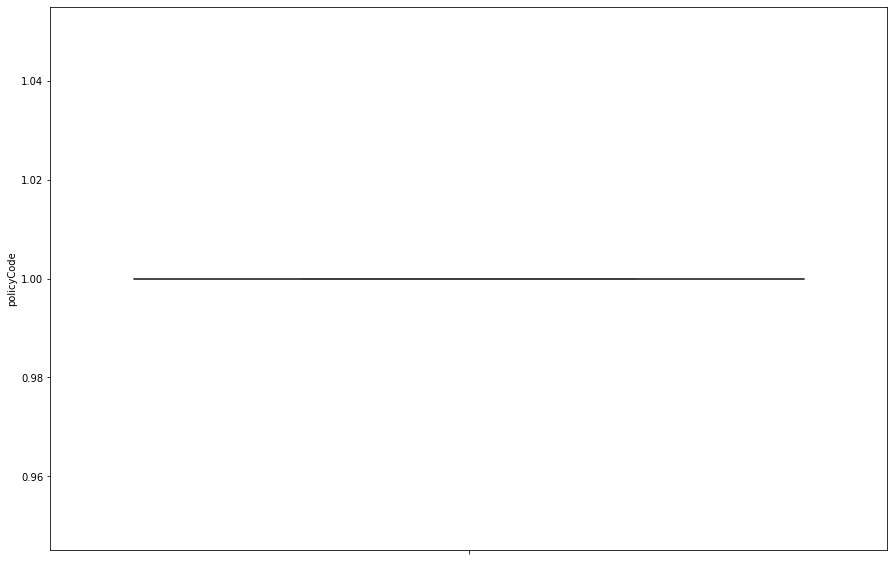

count    800000.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: policyCode, dtype: float64


In [231]:
Outliers_Detect_Plot(train_X,col ='policyCode')

In [232]:
"""policyCode 取值一样，没有异常"""

'policyCode 取值一样，没有异常'

## n0

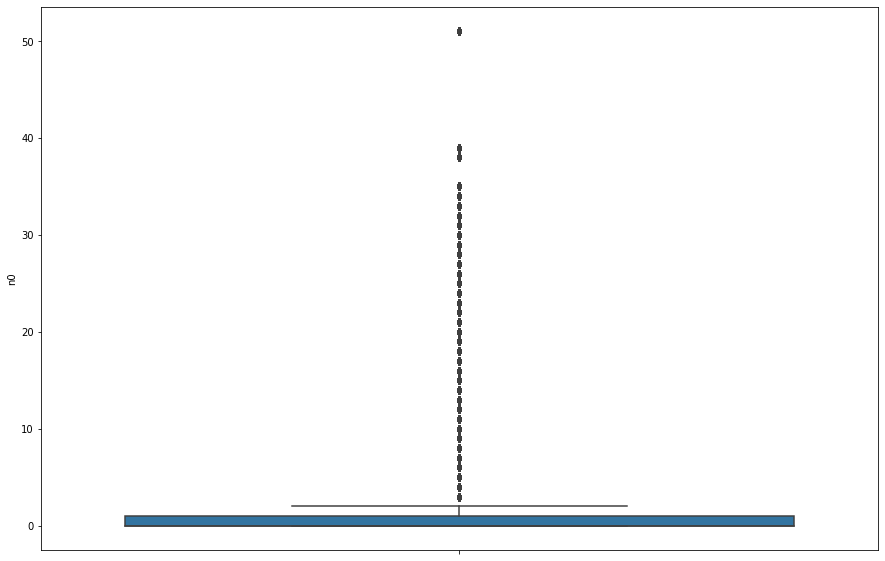

count    800000.000000
mean          1.465745
std           5.129754
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          51.000000
Name: n0, dtype: float64 

四分位high: 2.5
四分位low: -1.5
over_high总数：82612, below_low总数：0


In [240]:
Outliers_Detect_Plot(train_X, col ='n0')

In [241]:
Outliers_Handle_IQR(train_X,col = 'n0')

0         0.0
1         3.5
2         0.0
3         3.5
4         1.0
         ... 
799995    0.0
799996    0.0
799997    2.0
799998    0.0
799999    2.0
Name: n0, Length: 800000, dtype: float64

## n1

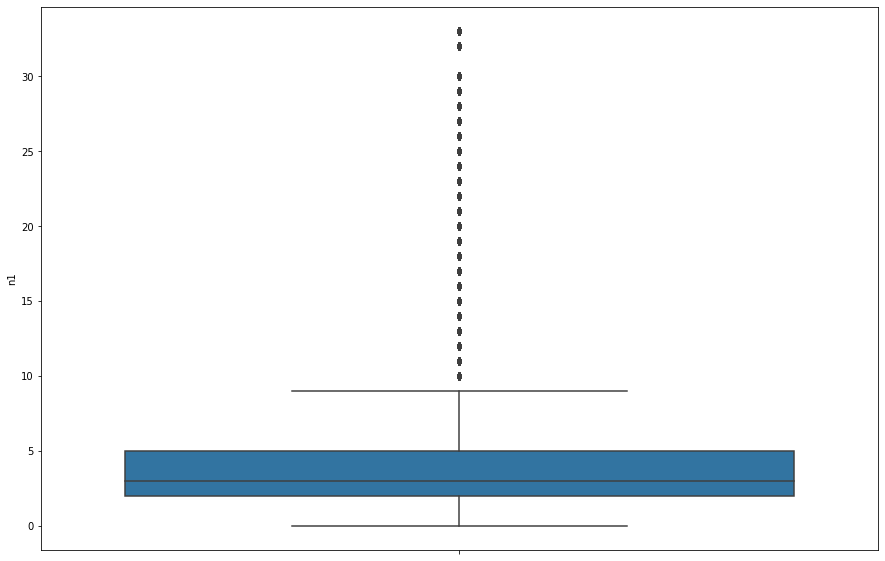

count    800000.000000
mean          4.266936
std           4.099039
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          33.000000
Name: n1, dtype: float64 

四分位high: 9.5
四分位low: -2.5
over_high总数：43860, below_low总数：0


In [242]:
Outliers_Detect_Plot(train_X, col = 'n1')

In [244]:
train_X['n1'] = Outliers_Handle_IQR(train_X, col = 'n1')

## n2

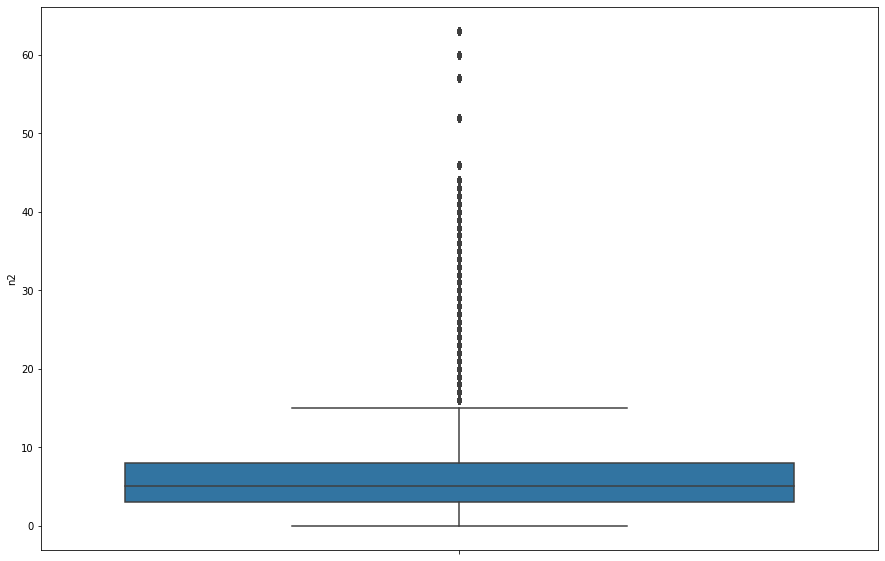

count    800000.000000
mean          6.636097
std           6.487585
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          63.000000
Name: n2, dtype: float64 

四分位high: 15.5
四分位low: -4.5
over_high总数：38337, below_low总数：0


In [245]:
Outliers_Detect_Plot(train_X, col = 'n2')

In [247]:
train_X['n2'] = Outliers_Handle_IQR(train_X, col = 'n2')

## n3

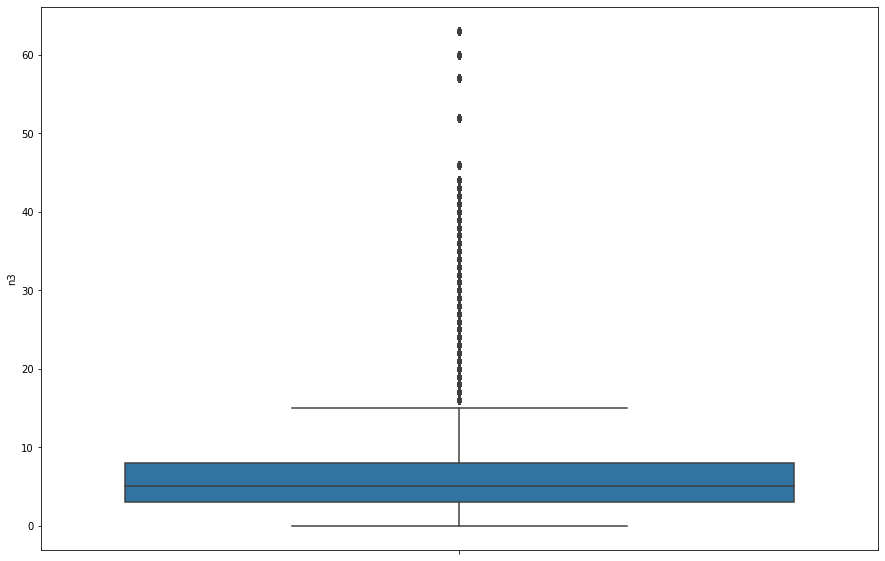

count    800000.000000
mean          6.627741
std           6.448117
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          63.000000
Name: n3, dtype: float64 

四分位high: 15.5
四分位low: -4.5
over_high总数：38256, below_low总数：0


In [248]:
Outliers_Detect_Plot(train_X, col = 'n3')

In [249]:
train_X['n3'] = Outliers_Handle_IQR(train_X,col = 'n3')

## n4

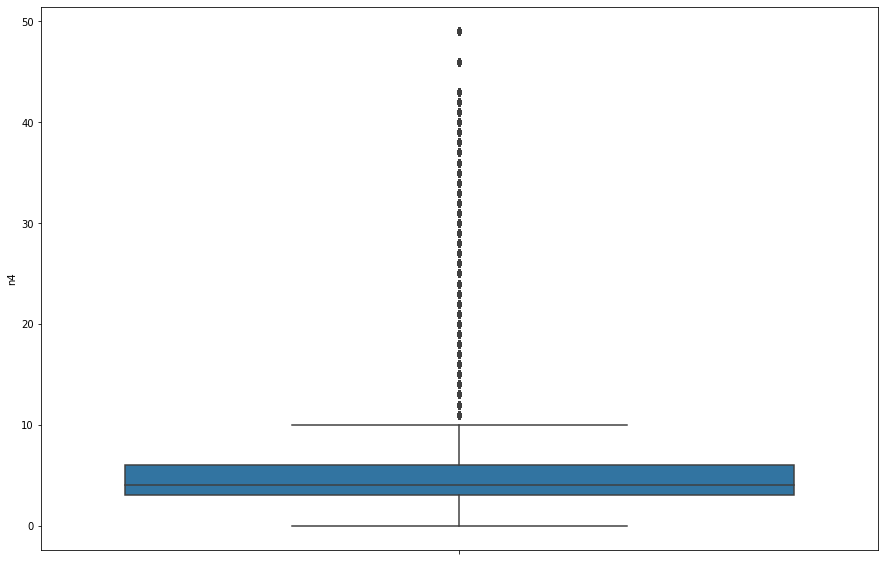

count    800000.000000
mean          5.483682
std           5.358346
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          49.000000
Name: n4, dtype: float64 

四分位high: 10.5
四分位low: -1.5
over_high总数：59408, below_low总数：0


In [251]:
Outliers_Detect_Plot(train_X, col = 'n4')

In [254]:
train_X['n4'] = Outliers_Handle_IQR(train_X, col = 'n4')

## n5

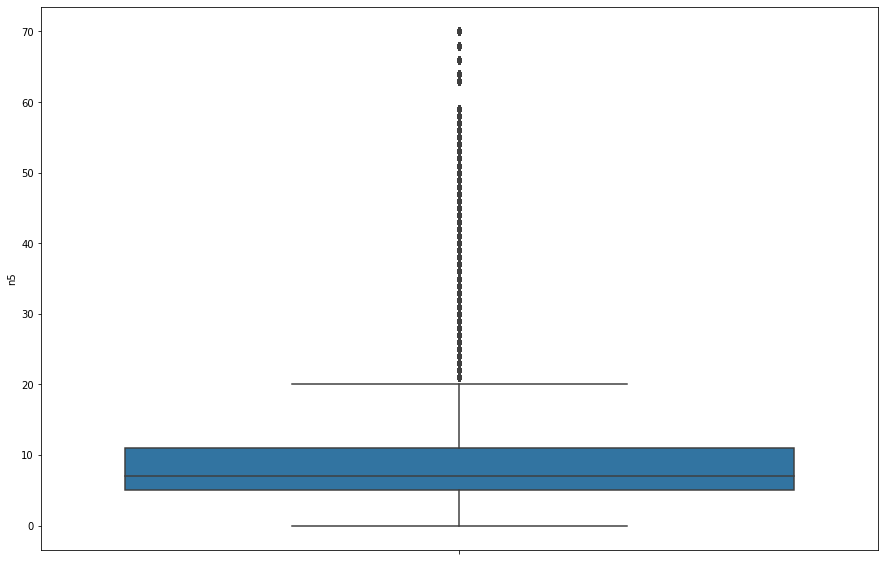

count    800000.000000
mean          9.319463
std           8.261640
min           0.000000
25%           5.000000
50%           7.000000
75%          11.000000
max          70.000000
Name: n5, dtype: float64 

四分位high: 20.0
四分位low: -4.0
over_high总数：43260, below_low总数：0


In [255]:
Outliers_Detect_Plot(train_X, col = 'n5')

In [256]:
train_X['n5'] = Outliers_Handle_IQR(train_X, col = 'n5')

## n6

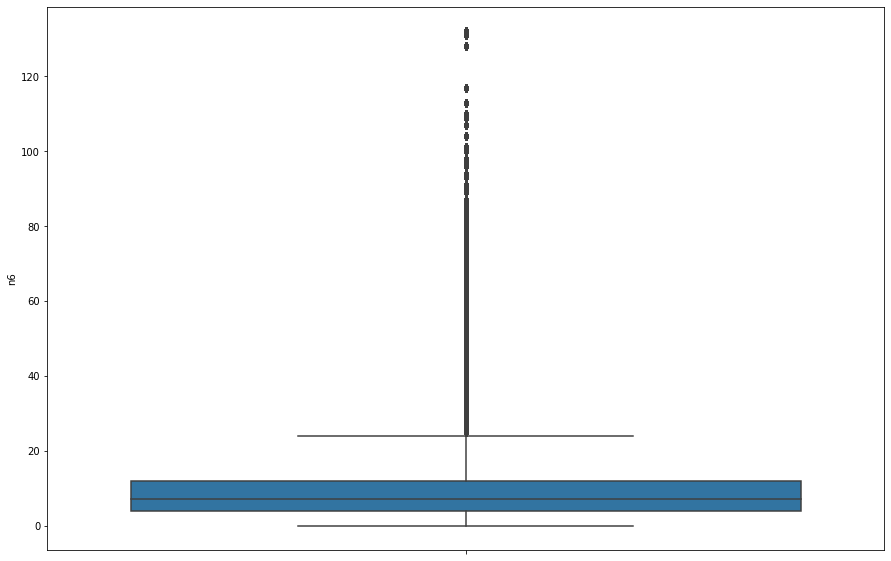

count    800000.000000
mean         10.885224
std          14.442949
min           0.000000
25%           4.000000
50%           7.000000
75%          12.000000
max         132.000000
Name: n6, dtype: float64 

四分位high: 24.0
四分位low: -8.0
over_high总数：62256, below_low总数：0


In [257]:
Outliers_Detect_Plot(train_X, col = 'n6')

In [258]:
train_X['n6'] = Outliers_Handle_IQR(train_X, col = 'n6')

## n7

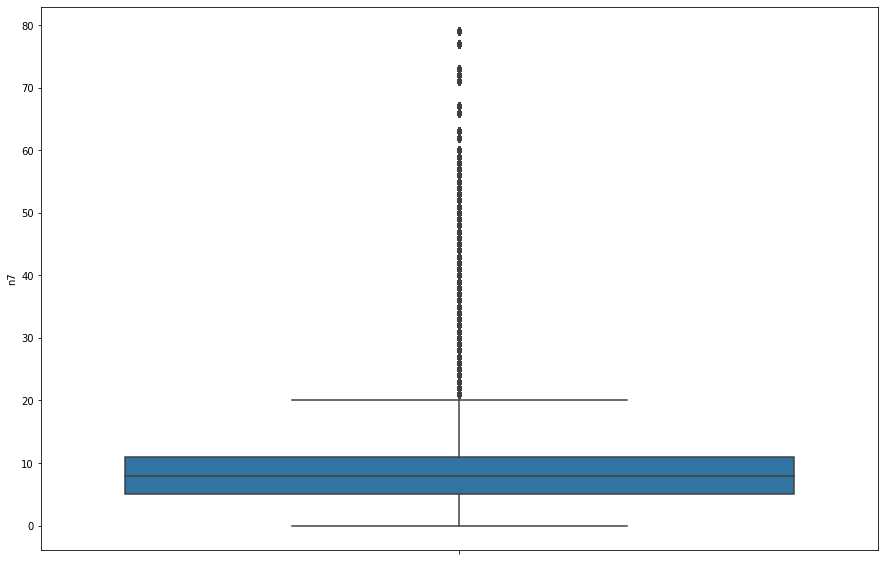

count    800000.000000
mean          9.639178
std           8.795371
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          79.000000
Name: n7, dtype: float64 

四分位high: 20.0
四分位low: -4.0
over_high总数：43118, below_low总数：0


In [259]:
Outliers_Detect_Plot(train_X, col = 'n7')

In [260]:
train_X['n7'] = Outliers_Handle_IQR(train_X, col = 'n7')

## n8

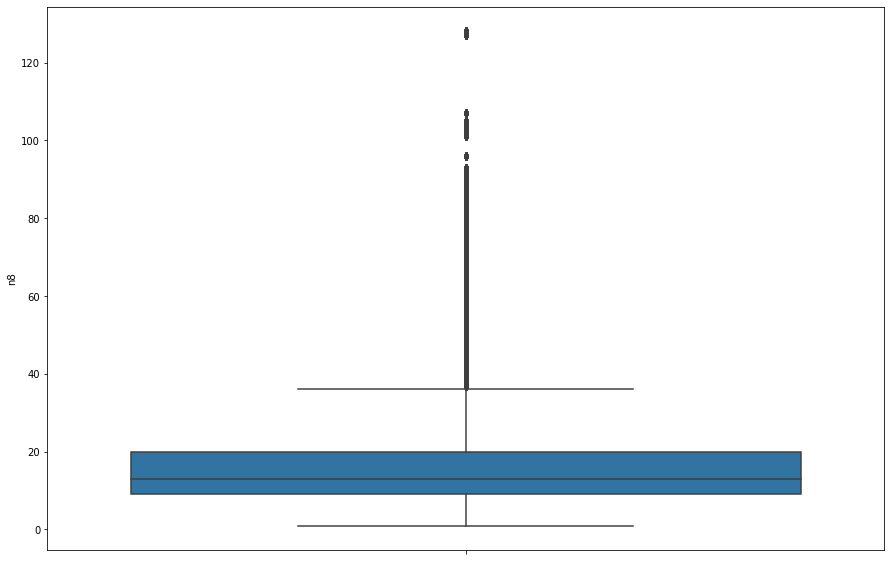

count    800000.000000
mean         16.535215
std          13.444494
min           1.000000
25%           9.000000
50%          13.000000
75%          20.000000
max         128.000000
Name: n8, dtype: float64 

四分位high: 36.5
四分位low: -7.5
over_high总数：40304, below_low总数：0


In [261]:
Outliers_Detect_Plot(train_X, col = 'n8')

In [262]:
train_X['n8'] = Outliers_Handle_IQR(train_X, col = 'n8')

## n9

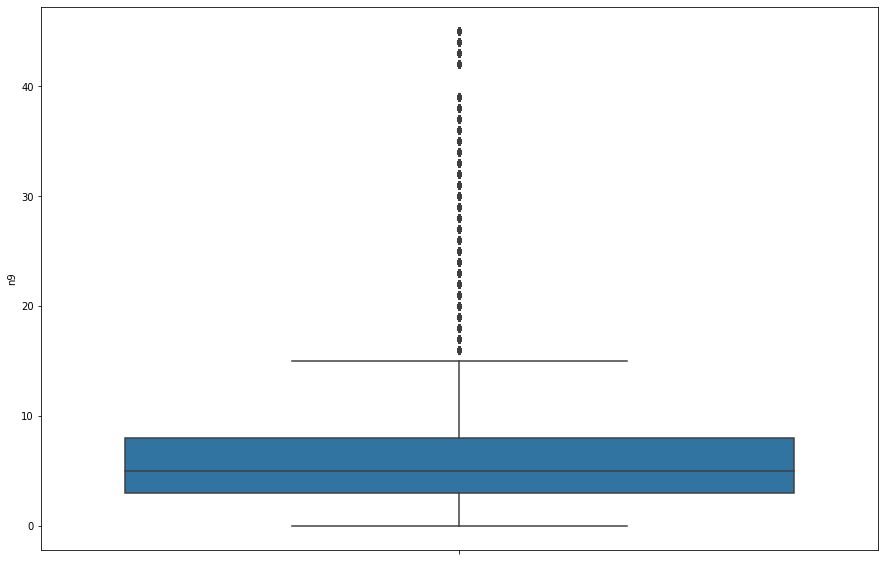

count    800000.000000
mean          6.401205
std           5.537482
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          45.000000
Name: n9, dtype: float64 

四分位high: 15.5
四分位low: -4.5
over_high总数：35124, below_low总数：0


In [263]:
Outliers_Detect_Plot(train_X, col = 'n9')

In [264]:
train_X['n9'] = Outliers_Handle_IQR(train_X,col ='n9')

## n10

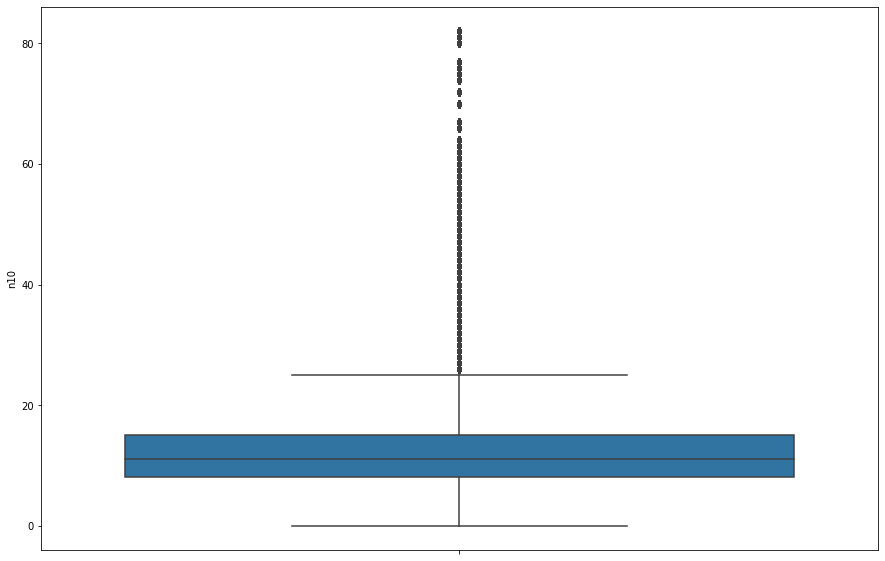

count    800000.000000
mean         12.745850
std           8.875374
min           0.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          82.000000
Name: n10, dtype: float64 

四分位high: 25.5
四分位low: -2.5
over_high总数：38869, below_low总数：0


In [265]:
Outliers_Detect_Plot(train_X,col = 'n10')

In [266]:
train_X['n10'] = Outliers_Handle_IQR(train_X, col ='n10')

## n11

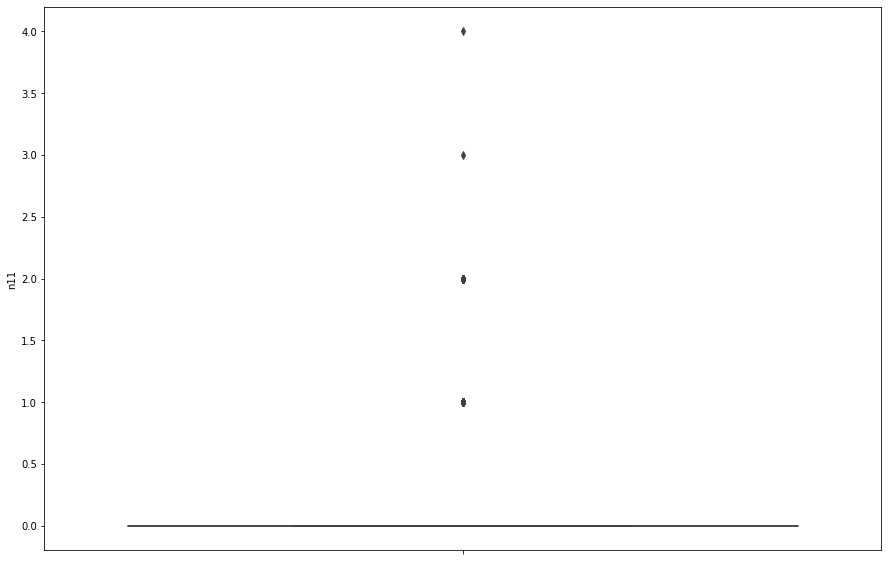

count    730248.000000
mean          0.000815
std           0.030075
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: n11, dtype: float64 

四分位high: 0.0
四分位low: 0.0
over_high总数：566, below_low总数：0


In [270]:
Outliers_Detect_Plot(train_X,col = 'n11')

In [271]:
train_X['n11'] = Outliers_Handle_IQR(train_X, col = 'n11')

## n12

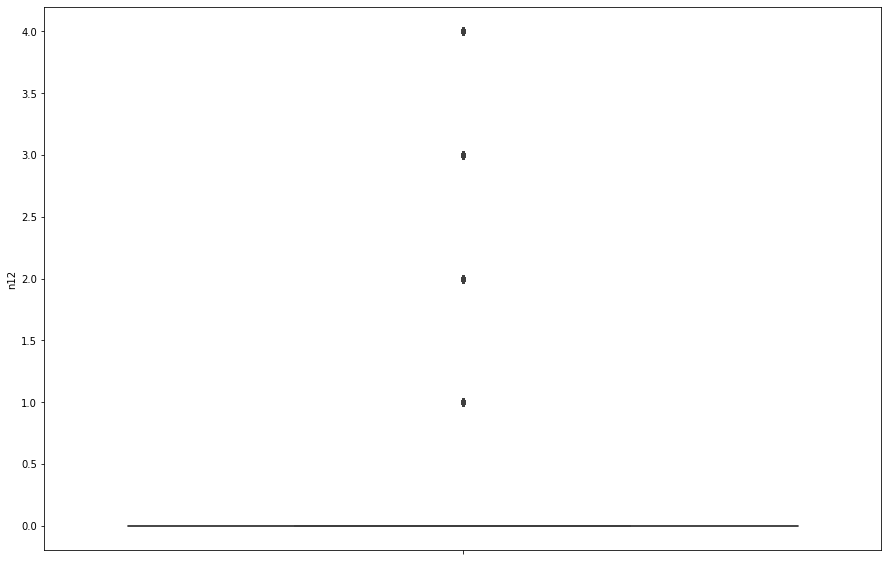

count    800000.000000
mean          0.104347
std           0.544600
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: n12, dtype: float64 

四分位high: 0.0
四分位low: 0.0
over_high总数：34684, below_low总数：0


In [272]:
Outliers_Detect_Plot(train_X,col='n12')

In [274]:
train_X['n12'] = Outliers_Handle_IQR(train_X,col ='n12')

## n13

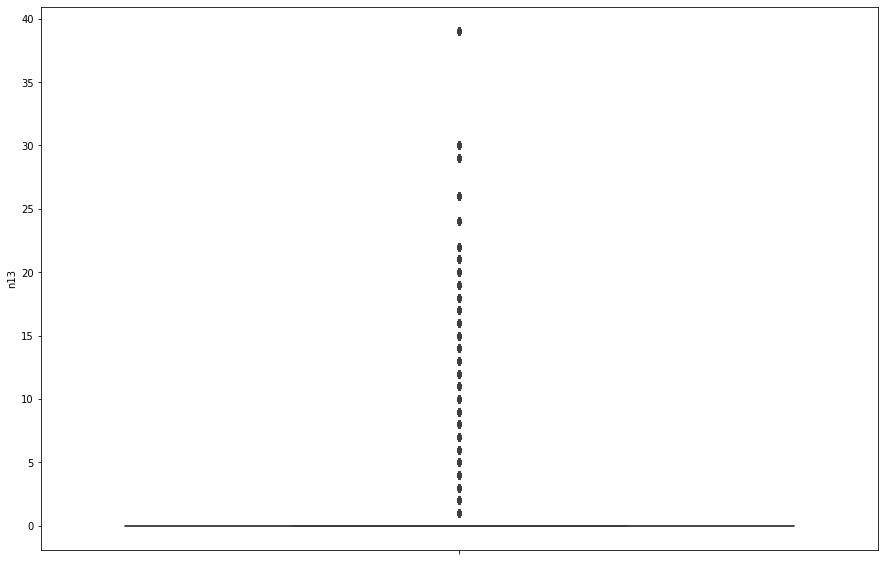

count    800000.000000
mean          0.806239
std           3.814902
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: n13, dtype: float64 

四分位high: 0.0
四分位low: 0.0
over_high总数：82409, below_low总数：0


In [275]:
Outliers_Detect_Plot(train_X, col = 'n13')

In [276]:
train_X['n13'] = Outliers_Handle_IQR(train_X,col ='n13')

## n14

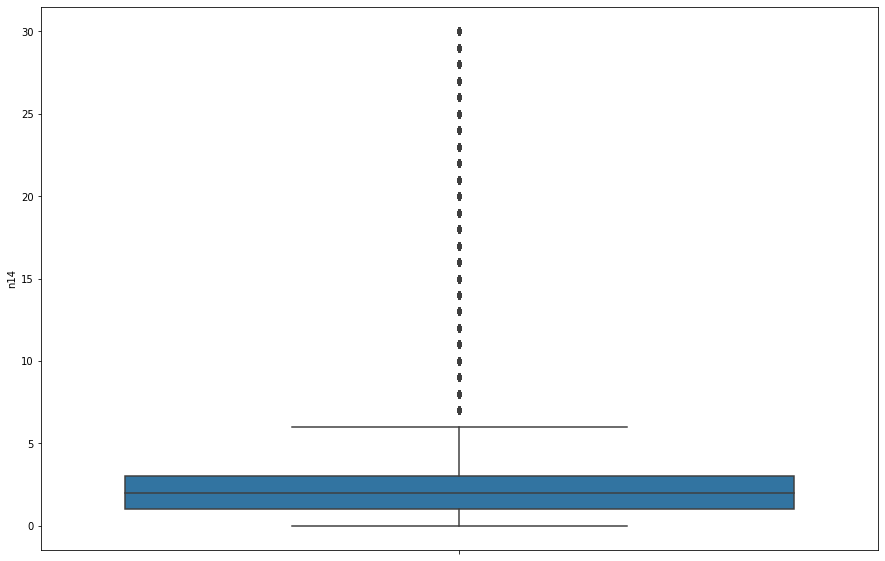

count    800000.000000
mean          2.825500
std           3.889121
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          30.000000
Name: n14, dtype: float64 

四分位high: 6.0
四分位low: -2.0
over_high总数：51838, below_low总数：0


In [277]:
Outliers_Detect_Plot(train_X,col = 'n14')

In [278]:
train_X['n14'] = Outliers_Handle_IQR(train_X,col ='n14')

In [279]:
train_X.to_csv("./train_filled_Outliers.csv", index = False)